<a href="https://colab.research.google.com/github/22MIS1002/DATAMINING_CODING/blob/main/DATAMINING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#                                           J COMPONENT IMPLEMENTATION

# CHURN PREDICTION IN OVER-THE-TOP(OTT) FOR CUSTOMER RETENSION USING MACHINE LEARNING ALGORITHMS

# **1.Collection of Data & Preprocessing:**

The dataset is collected from Kaggle.


In [ ]:
# IMPORTING LIBRARIES
import numpy as np # for numerical computing
import pandas as pd # for dataframes
import seaborn as sns # for easier visualization
from matplotlib import pyplot as plt # for visualization and to display plots
from matplotlib.colors import ListedColormap # import color maps

In [ ]:
# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

from math import sqrt

# to split train and test set
from sklearn.model_selection import train_test_split

#importing the required ML libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score

**Initially we import all the necessary libraries that are required for predictions.**


In [ ]:
# Reading the dataset and storing it in  variable 'OTT_Churn'
OTT_Churn = pd.read_csv("/content/customer_data.csv")
# Printing the dataset
OTT_Churn

year  customer_id  phone_no  gender  age  no_of_days_subscribed  \
0     2015       100198  409-8743  Female   36                     62   
1     2015       100643  340-5930  Female   39                    149   
2     2015       100756  372-3750  Female   65                    126   
3     2015       101595  331-4902  Female   24                    131   
4     2015       101653  351-8398  Female   40                    191   
...    ...          ...       ...     ...  ...                    ...   
1995  2015       997132  385-7387  Female   54                     75   
1996  2015       998086  383-9255    Male   45                    127   
1997  2015       998474  353-2080     NaN   53                     94   
1998  2015       998934  359-7788    Male   40                     94   
1999  2015       999961  414-1496    Male   37                     73   

     multi_screen mail_subscribed  weekly_mins_watched  minimum_daily_mins  \
0              no              no               148.35                12.2   
1              no              no               294.45                 7.7   
2              no              no                87.30                11.9   
3              no             yes               321.30                 9.5   
4              no              no               243.00                10.9   
...           ...             ...                  ...                 ...   
1995           no             yes               182.25                11.3   
1996           no              no               273.45                 9.3   
1997           no              no               128.85                15.6   
1998           no              no               178.05                10.4   
1999           no              no               326.70                10.3   

      maximum_daily_mins  weekly_max_night_mins  videos_watched  \
0                  16.81                     82               1   
1                  33.37                     87               3   
2                   9.89                     91               1   
3                  36.41                    102               4   
4                  27.54                     83               7   
...                  ...                    ...             ...   
1995               20.66                     97               5   
1996               30.99                    116               3   
1997               14.60                    110              16   
1998               20.18                    100               6   
1999               37.03                     89               6   

      maximum_days_inactive  customer_support_calls  churn  
0                       4.0                       1    0.0  
1                       3.0                       2    0.0  
2                       4.0                       5    1.0  
3                       3.0                       3    0.0  
4                       3.0                       1    0.0  
...                     ...                     ...    ...  
1995                    4.0                       2    NaN  
1996                    3.0                       1    0.0  
1997                    5.0                       0    0.0  
1998                    NaN                       3    0.0  
1999                    3.0                       1    1.0  

[2000 rows x 16 columns]

**Loading the dataset using pd.read_csv command ad storing it in “OTT_Churn”.**


In [ ]:
# Dropping the column 'customer_id' and 'year'
OTT_Churn.drop('customer_id', axis='columns', inplace=True)
OTT_Churn.drop('year', axis='columns', inplace=True)

In [ ]:
# Seeing the data types of each and every attribute
OTT_Churn.dtypes

phone_no                   object
gender                     object
age                         int64
no_of_days_subscribed       int64
multi_screen               object
mail_subscribed            object
weekly_mins_watched       float64
minimum_daily_mins        float64
maximum_daily_mins        float64
weekly_max_night_mins       int64
videos_watched              int64
maximum_days_inactive     float64
customer_support_calls      int64
churn                     float64
dtype: object

**We are removing Customer_id and Year columns since there is no use with those columns. After that we are checking the types of every attribute as it will help in analysis.**

In [ ]:
# seeing the information of dataset
OTT_Churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   phone_no                2000 non-null   object 
 1   gender                  1976 non-null   object 
 2   age                     2000 non-null   int64  
 3   no_of_days_subscribed   2000 non-null   int64  
 4   multi_screen            2000 non-null   object 
 5   mail_subscribed         2000 non-null   object 
 6   weekly_mins_watched     2000 non-null   float64
 7   minimum_daily_mins      2000 non-null   float64
 8   maximum_daily_mins      2000 non-null   float64
 9   weekly_max_night_mins   2000 non-null   int64  
 10  videos_watched          2000 non-null   int64  
 11  maximum_days_inactive   1972 non-null   float64
 12  customer_support_calls  2000 non-null   int64  
 13  churn                   1965 non-null   float64
dtypes: float64(5), int64(5), object(4)
memor

**Here we are checking the information of each and every attribute like how many null values, Type of that attribute.**

In [ ]:
# Printing all the columns of dataset
OTT_Churn.columns

Index(['phone_no', 'gender', 'age', 'no_of_days_subscribed', 'multi_screen',
       'mail_subscribed', 'weekly_mins_watched', 'minimum_daily_mins',
       'maximum_daily_mins', 'weekly_max_night_mins', 'videos_watched',
       'maximum_days_inactive', 'customer_support_calls', 'churn'],
      dtype='object')

Types of features :

1)Categorical : gender, multi_screen, mail_subscribed, churn

2)Continuous : age, no_of_days_subscribed, weekly_mins_watched, minimum_daily_mins, maximum_daily_mins, weekly_max_night_mins, videos_watched, maximum_days_inactive, customer_support_calls

3)Alphanumeric: phone_no

Since the attribute 'phone_no' is alphanumeric we will drop that attribute too

In [ ]:
OTT_Churn.drop('phone_no', axis='columns', inplace=True)

**We are listing all the columns of the data and grouping with their type. Then we are removing the phone_no column as it doesn’t have any importance in prediction of churn**

In [ ]:
OTT_Churn.head()

gender  age  no_of_days_subscribed multi_screen mail_subscribed  \
0  Female   36                     62           no              no   
1  Female   39                    149           no              no   
2  Female   65                    126           no              no   
3  Female   24                    131           no             yes   
4  Female   40                    191           no              no   

   weekly_mins_watched  minimum_daily_mins  maximum_daily_mins  \
0               148.35                12.2               16.81   
1               294.45                 7.7               33.37   
2                87.30                11.9                9.89   
3               321.30                 9.5               36.41   
4               243.00                10.9               27.54   

   weekly_max_night_mins  videos_watched  maximum_days_inactive  \
0                     82               1                    4.0   
1                     87               3                    3.0   
2                     91               1                    4.0   
3                    102               4                    3.0   
4                     83               7                    3.0   

   customer_support_calls  churn  
0                       1    0.0  
1                       2    0.0  
2                       5    1.0  
3                       3    0.0  
4                       1    0.0

**Using head function we are showing the first five records of dataset.**

# Handling Null Values

In [ ]:
OTT_Churn.isnull().sum()

gender                    24
age                        0
no_of_days_subscribed      0
multi_screen               0
mail_subscribed            0
weekly_mins_watched        0
minimum_daily_mins         0
maximum_daily_mins         0
weekly_max_night_mins      0
videos_watched             0
maximum_days_inactive     28
customer_support_calls     0
churn                     35
dtype: int64

We found the null values in the attributes 'gender', 'maximum_days_inactive', 'churn'. We fill with mode in 'gender' and with median in 'maximum_days_inactive', 'churn'.


Checking null values and handling them plays a vital role in data pre-processing
We found out that there are null values in three columns. We need to either delete them or impute with central tendency or any other feature. If we remove the null values then we have loss of data which in turns have the effect in performance of the model. So in order to not cause any problem, we use imputation methods and remove those null values.


In [ ]:
# Replacing missing values with mode in the 'gender' attribute
print("The Mode is :", (OTT_Churn.gender.mode()))

The Mode is : 0    Male
Name: gender, dtype: object


In [ ]:
OTT_Churn.gender.fillna('Male',inplace=True)

In [ ]:
# Replacing missing values with mode in the 'maximum_days_inactive.median' attribute
print("The Median is :", int(OTT_Churn.maximum_days_inactive.median()))

The Median is : 3


In [ ]:
OTT_Churn.maximum_days_inactive.fillna(3, inplace=True)

In [ ]:
# Replacing missing values with mode in the 'churn' attribute
print("The Median is :", int(OTT_Churn.churn.median()))

The Median is : 0


In [ ]:
OTT_Churn.churn.fillna(0, inplace=True)

**Here we are using ‘mode’ for gender column, ‘median’ for maximum_days_inactive and churn columns.**

We will check whether null values are there

In [ ]:
OTT_Churn.isnull().sum()

gender                    0
age                       0
no_of_days_subscribed     0
multi_screen              0
mail_subscribed           0
weekly_mins_watched       0
minimum_daily_mins        0
maximum_daily_mins        0
weekly_max_night_mins     0
videos_watched            0
maximum_days_inactive     0
customer_support_calls    0
churn                     0
dtype: int64

Therefore there are no missing values and we can proceed further

It is always better to check again whether the null values still present. So we observe zero null values so we can proceed further.

# Outlier Detection

Since every record is important and have impact on churn prediction we let the outliers also be part of the built machine learning models.

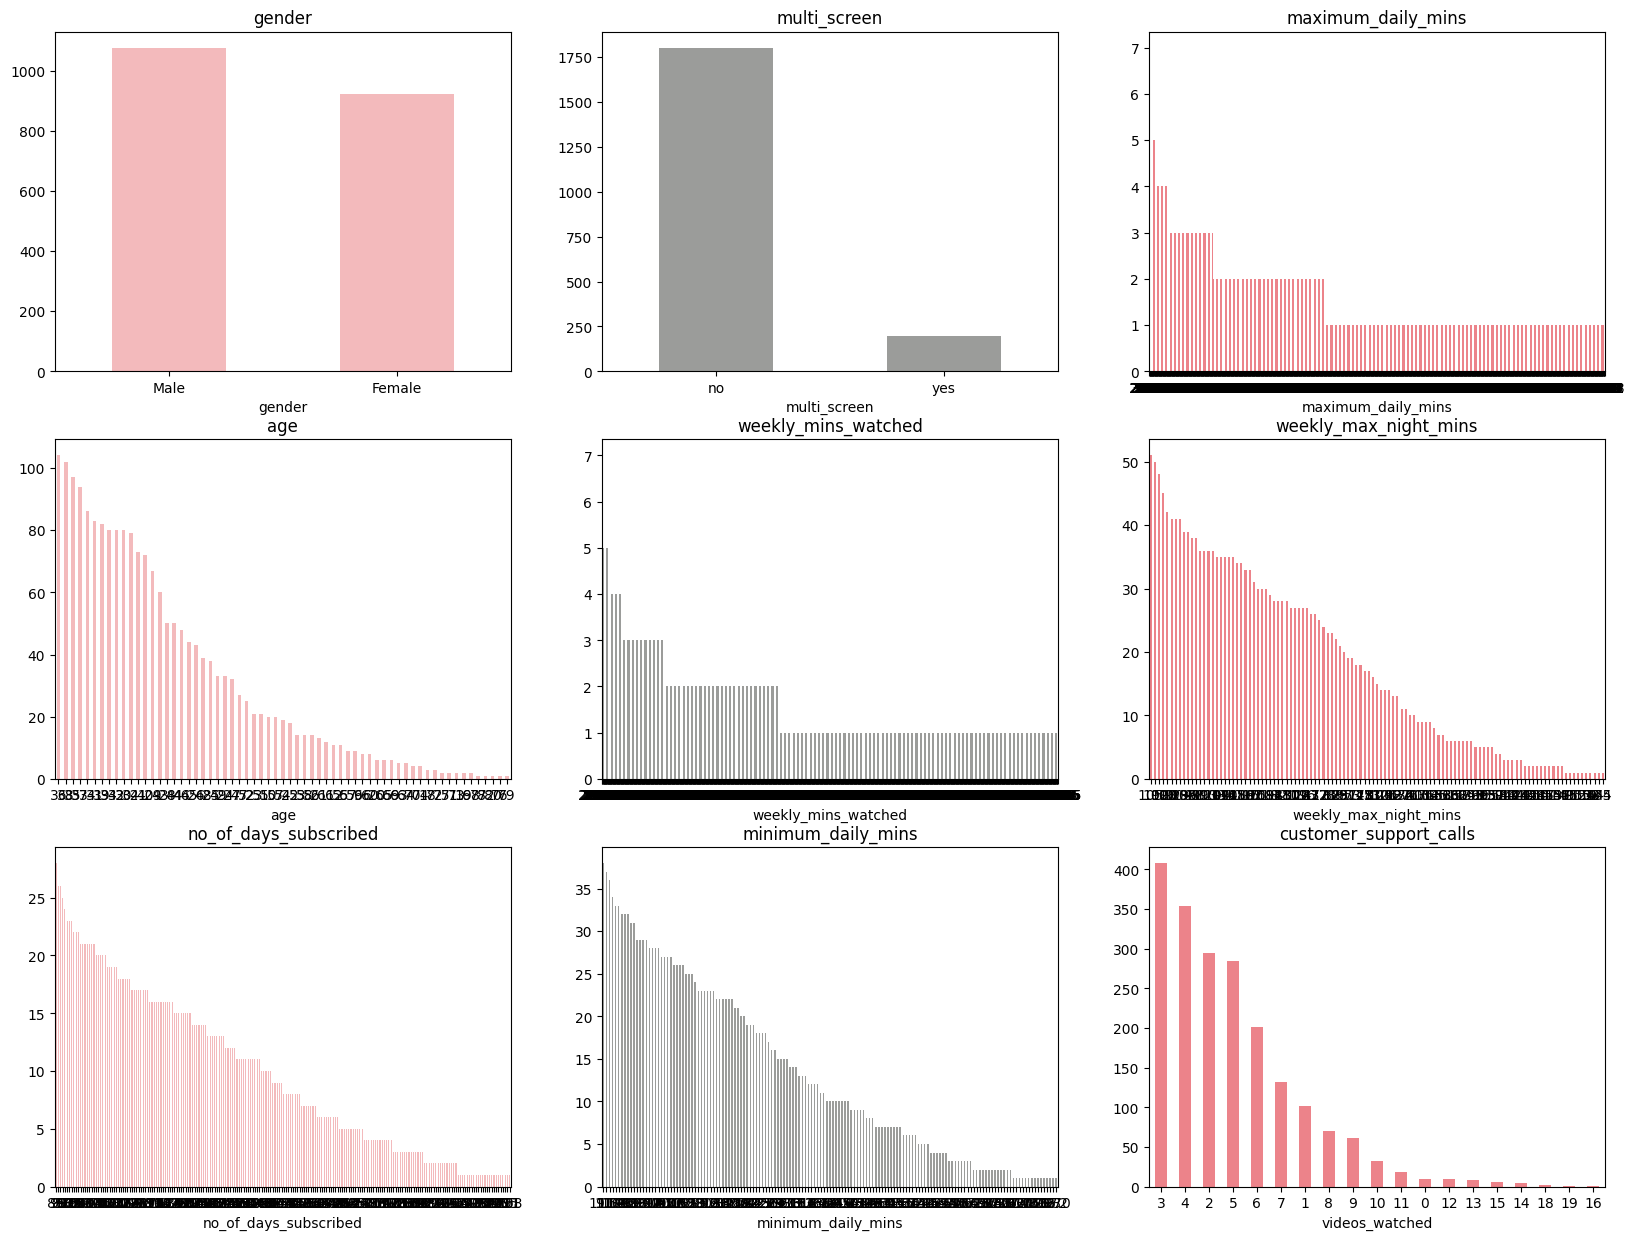

In [ ]:
# Plotting Bar chart
BarPlot = OTT_Churn[['gender','age','no_of_days_subscribed','multi_screen','weekly_mins_watched',
                      'minimum_daily_mins','maximum_daily_mins','weekly_max_night_mins','videos_watched',
                     'maximum_days_inactive','customer_support_calls']]
fig, axes = plt.subplots(nrows = 3,ncols = 3,
figsize = (20,15))
for i, item in enumerate(BarPlot):
    if i < 3:
        ax = OTT_Churn[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0, color ='#f3babc' )

    elif i >=3 and i < 6:
        ax = OTT_Churn[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1], rot = 0,color ='#9b9c9a')

    elif i < 9:
        ax = OTT_Churn[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0,color = '#ec838a')
    ax.set_title(item)

**above we are plotting bar graph for every attribute to show how the values are categorised or range of the values.**

# Scatter Plot

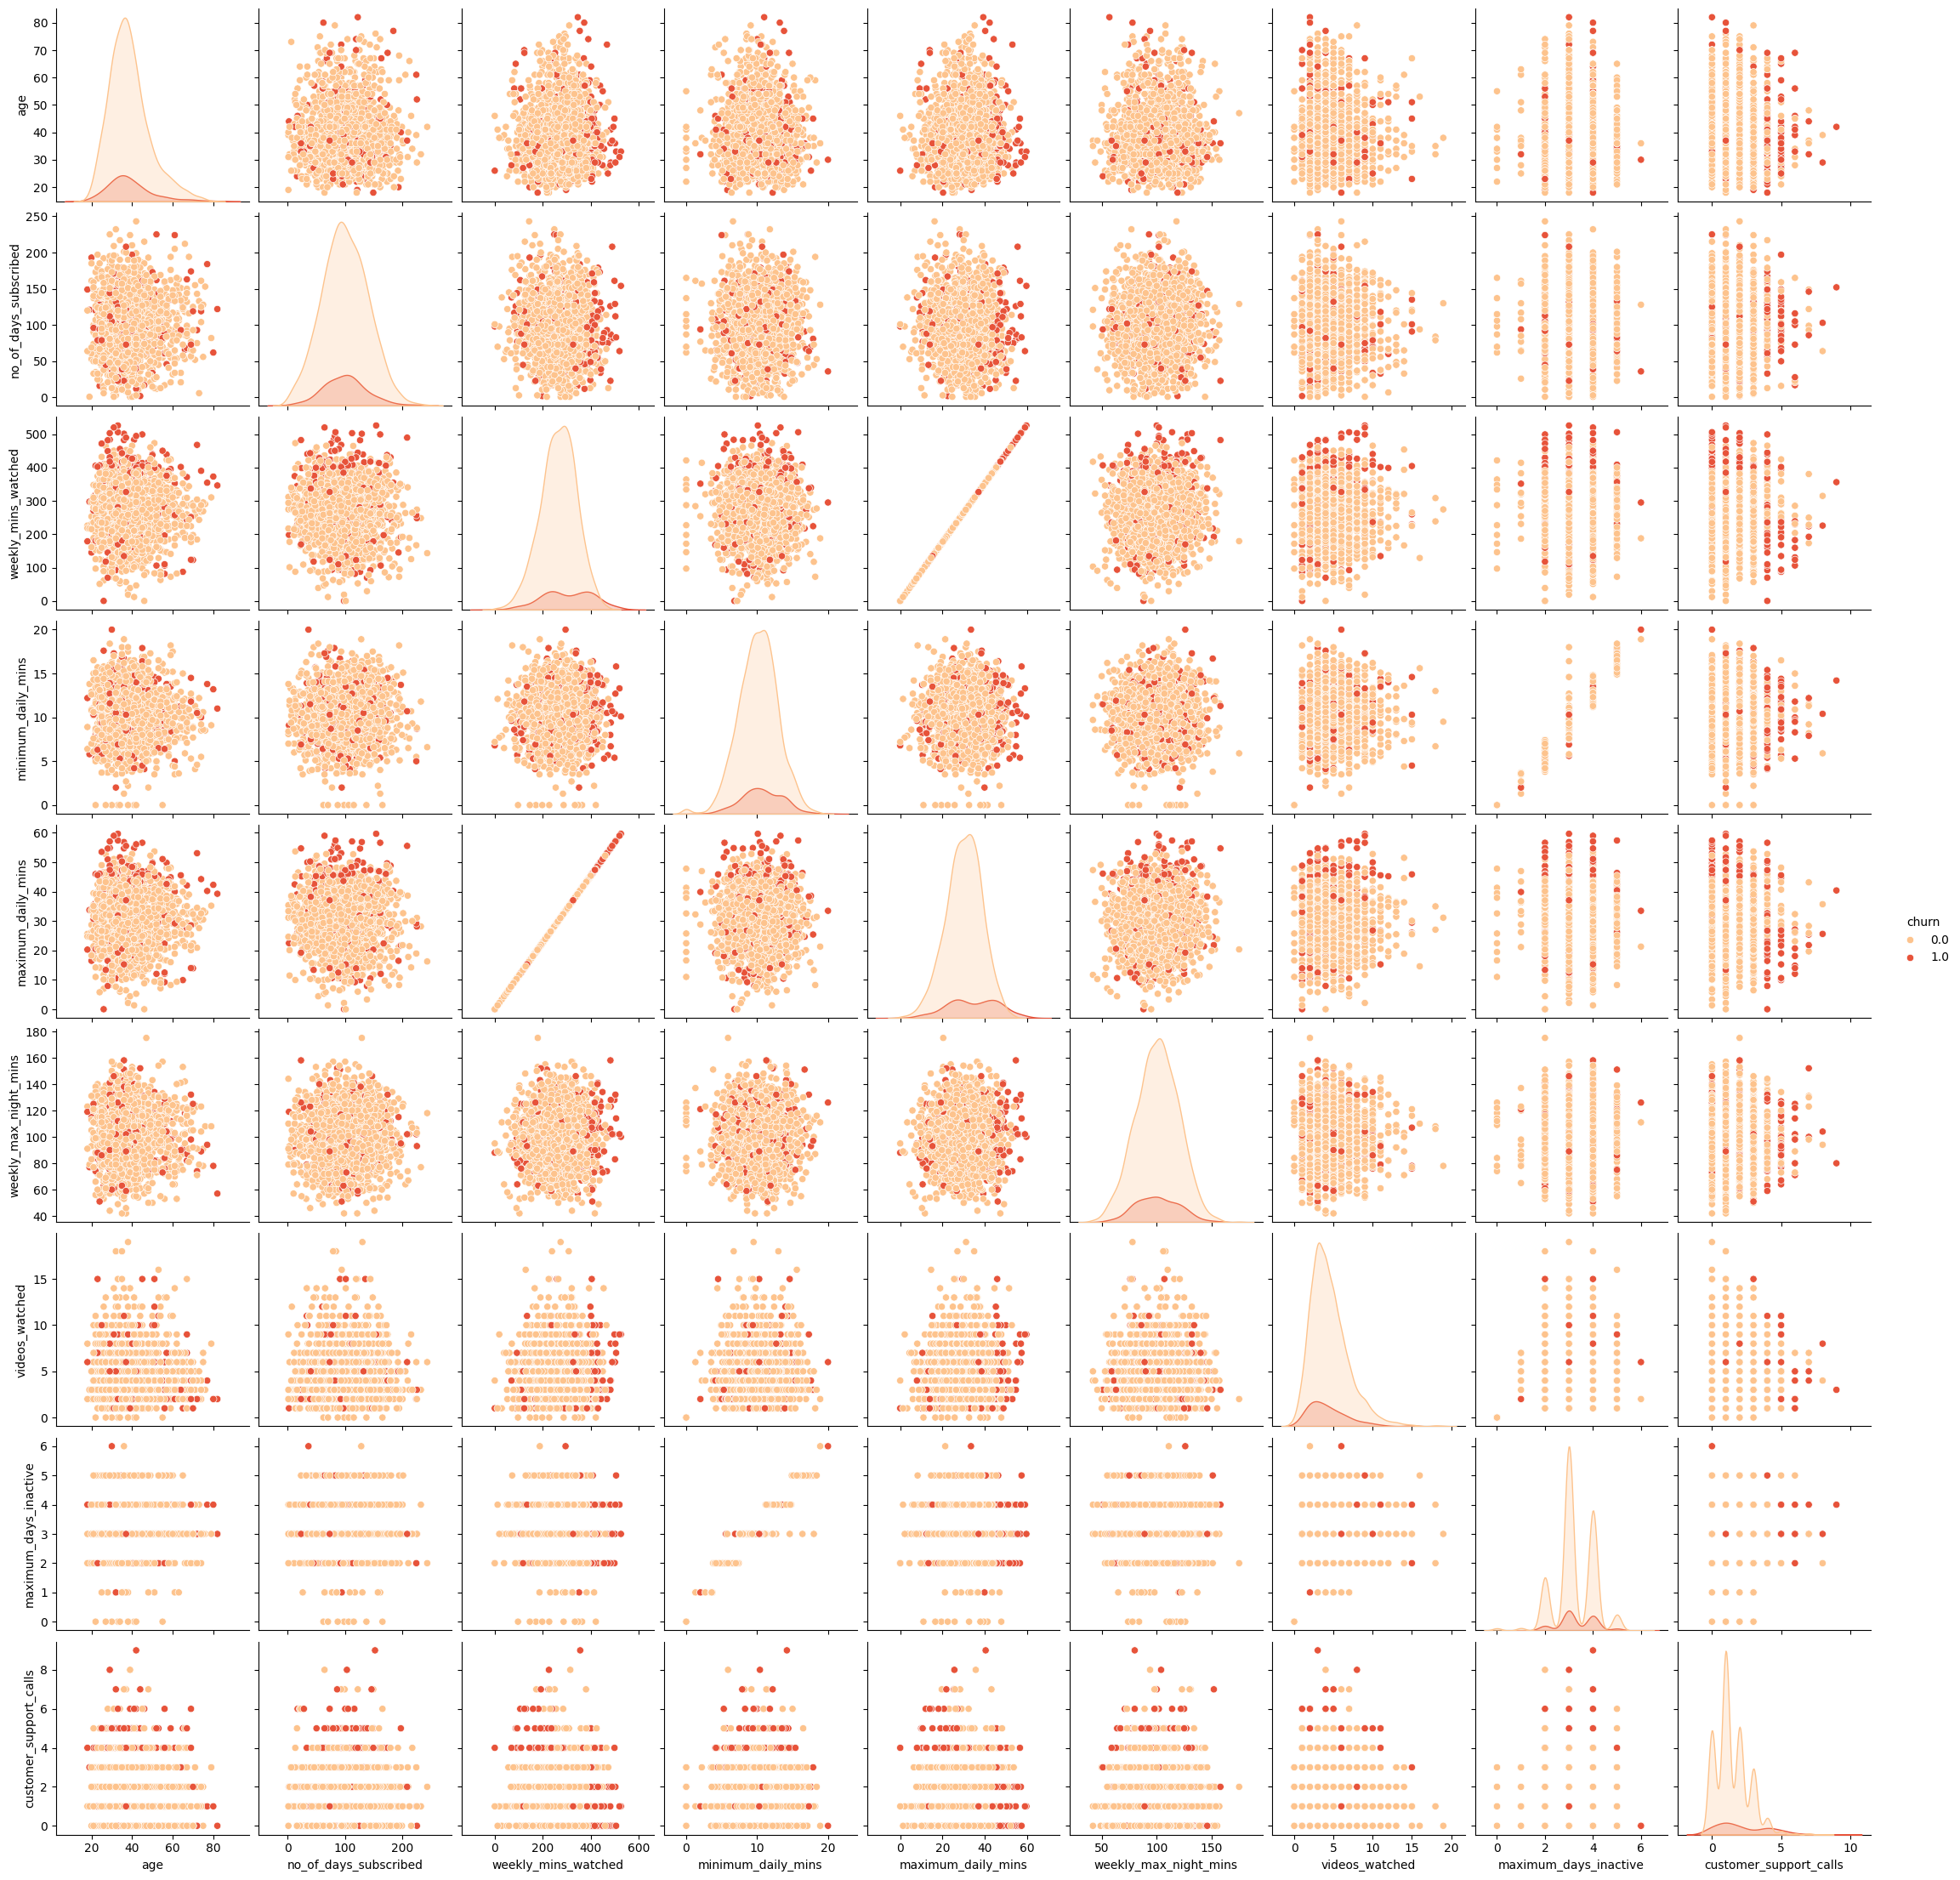

In [ ]:
# Scatter plot
col = OTT_Churn.columns
plot = sns.pairplot(OTT_Churn[col],hue='churn',palette='OrRd')


**Plotting the scatter plot to see how each attribute is related visually.**

# **2.Performing Machine Learning Algorithms**

# Correlation Matrix
Correlation matrix is plotted to see how each attribute is co related to each other.

In [ ]:
numeric_cols = OTT_Churn.select_dtypes(include=[np.number]).columns
OTT_Churn_numeric = OTT_Churn[numeric_cols]

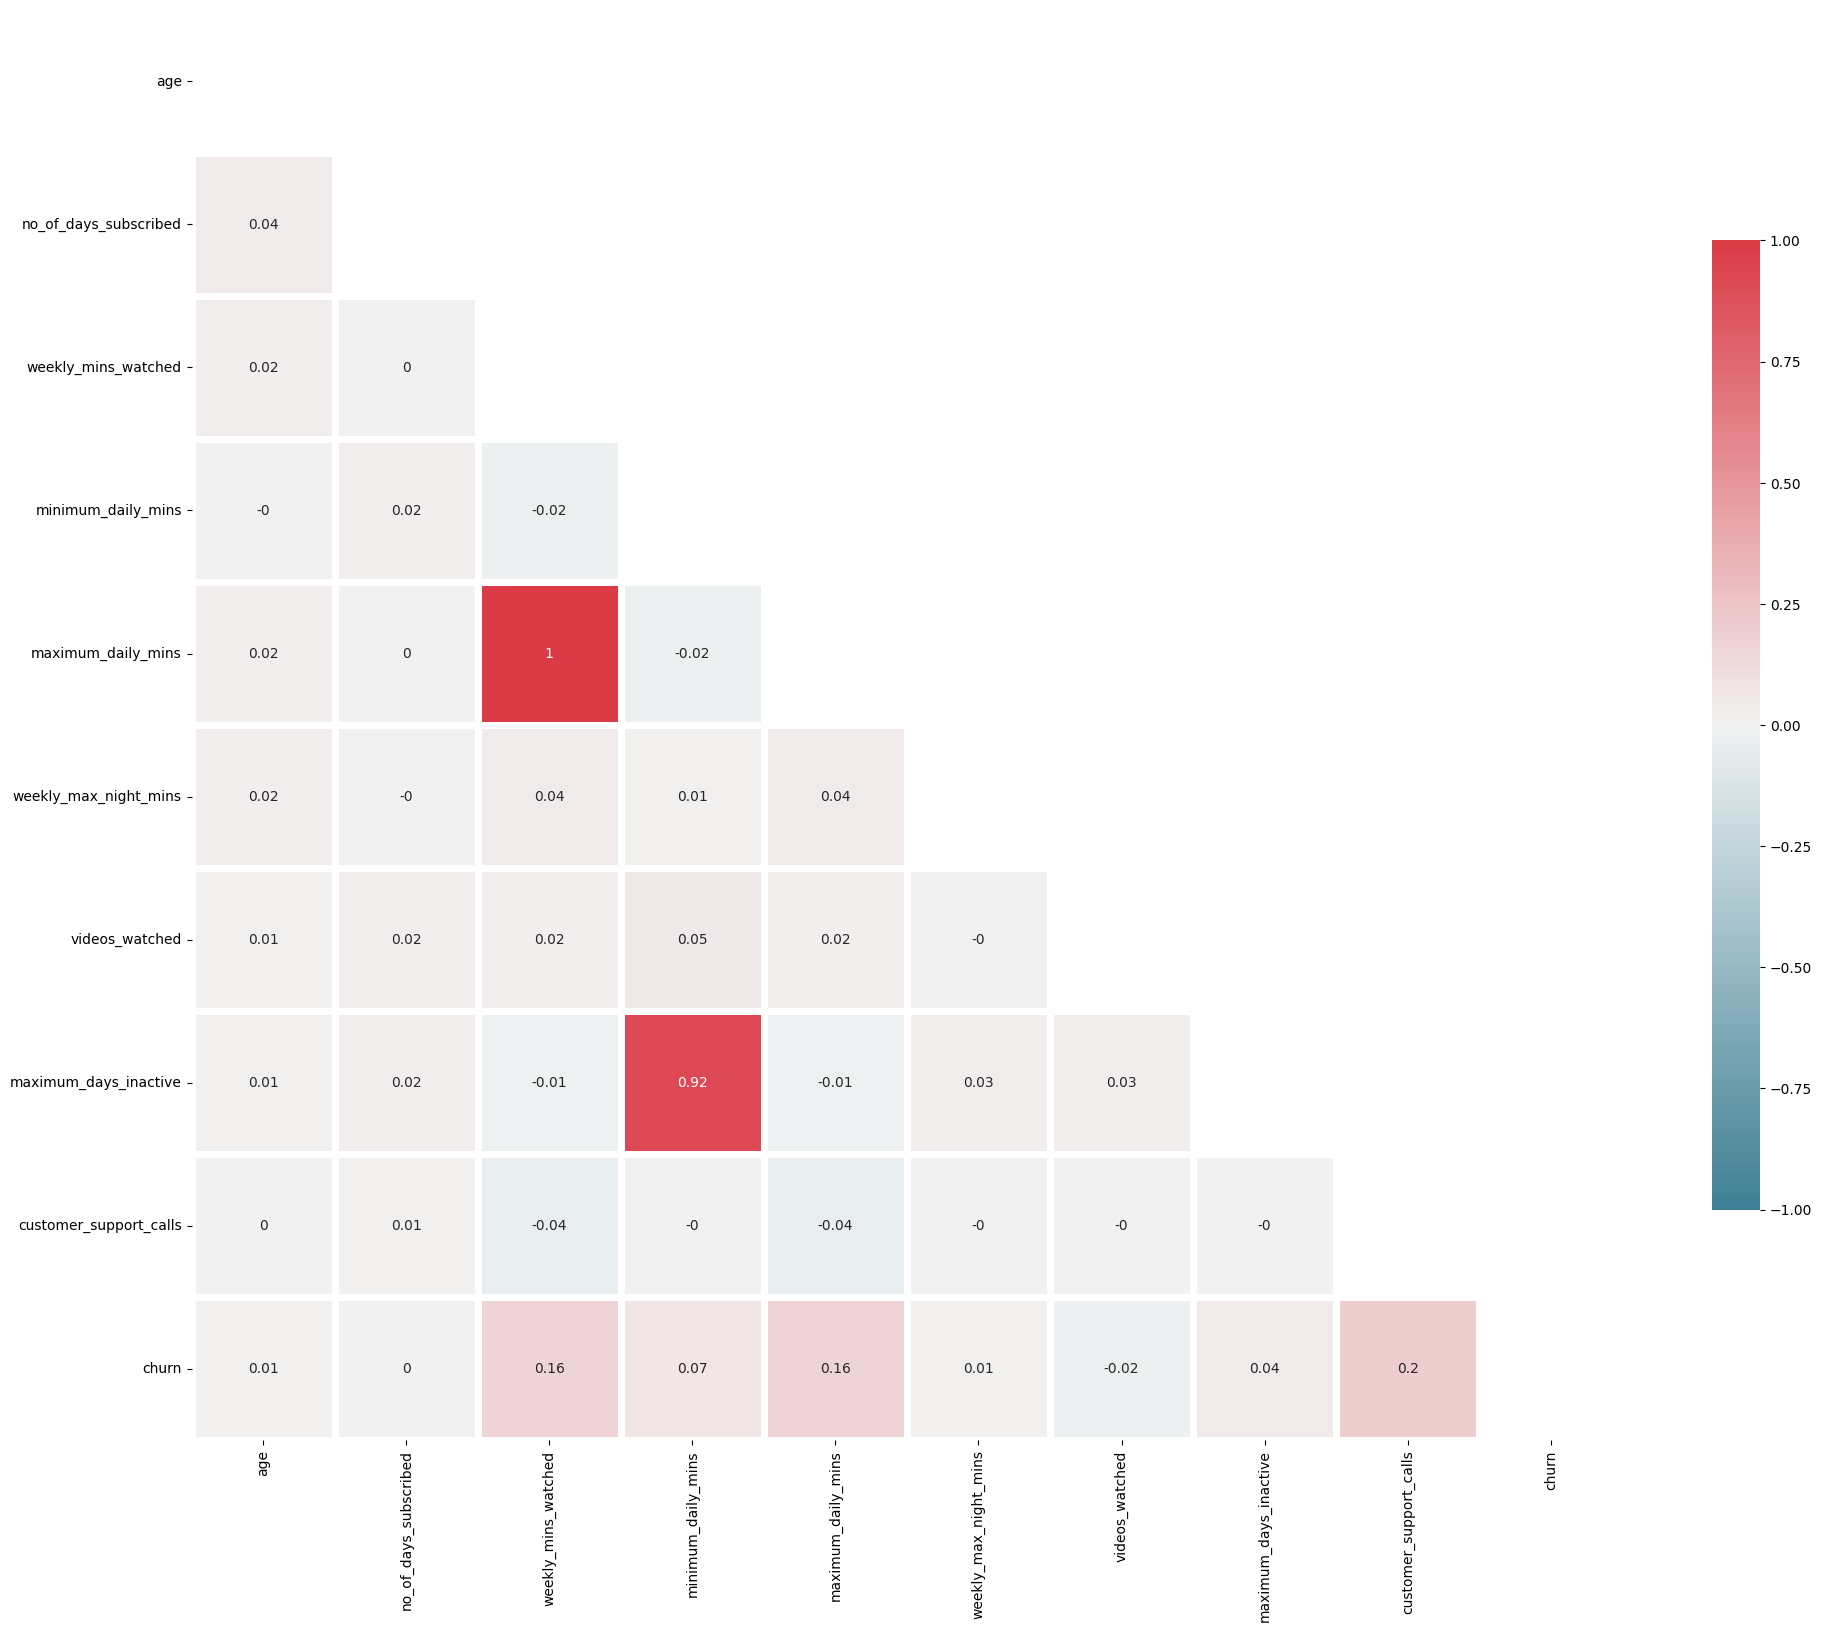

In [ ]:
import numpy as np
import pandas as pd

#plotting correlation matrix
corr = OTT_Churn_numeric.corr().round(2)
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(20, 20))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(
    corr,
    mask=mask,
    cmap=cmap,
    vmin=-1,
    vmax=1,
    center=0,
    square=True,
    linewidth=5,
    cbar_kws={"shrink": 0.5},
    annot=True,
)

plt.tight_layout()

We see weekly_min_watched and minimum_daily_mins are highly co related. Minimum_daily_mins and maximum_days_inactive are also highly co related. Our target variable is churn and with that variable, weekly_mins_watched and customer_support_calls are highly co related.

# Converting Categorical Data Into Numerical Data

In [ ]:
# Converting through dummies function and storing it in variable 'Churn'
Churn = pd.get_dummies(OTT_Churn,columns=['gender','multi_screen','mail_subscribed'],drop_first=True)
Churn.head()

age  no_of_days_subscribed  weekly_mins_watched  minimum_daily_mins  \
0   36                     62               148.35                12.2   
1   39                    149               294.45                 7.7   
2   65                    126                87.30                11.9   
3   24                    131               321.30                 9.5   
4   40                    191               243.00                10.9   

   maximum_daily_mins  weekly_max_night_mins  videos_watched  \
0               16.81                     82               1   
1               33.37                     87               3   
2                9.89                     91               1   
3               36.41                    102               4   
4               27.54                     83               7   

   maximum_days_inactive  customer_support_calls  churn  gender_Male  \
0                    4.0                       1    0.0        False   
1                    3.0                       2    0.0        False   
2                    4.0                       5    1.0        False   
3                    3.0                       3    0.0        False   
4                    3.0                       1    0.0        False   

   multi_screen_yes  mail_subscribed_yes  
0             False                False  
1             False                False  
2             False                False  
3             False                 True  
4             False                False

Since the columns gender, multi_screen, mail_subscribed are categorical we are converting those into numerical by using dummies

# Splitting out data into X: features and Y: target

In [ ]:
#Splitting out training data into X: features and Y: target
X = Churn.drop("churn",axis=1)
Y = Churn["churn"]

# Standardization of Data

In [ ]:
# Importing library
from sklearn.preprocessing import StandardScaler

In [ ]:
sc=StandardScaler()
sc=sc.fit(X)
X=sc.transform(X)

# Splitting the data into Training Data and Test Data

In [ ]:
# Splitting of training data and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4,random_state=69)

We are splitting the data into X and Y taking all features except churn as X and churn as Y. Standardizing data using standard scalar.

# Logistic Regression

In [ ]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train,Y_train)
Y_pred = logreg.predict(X_test)

In [ ]:
# Accuracy of Logistic Regression
acc_logreg = round(accuracy_score(Y_pred, Y_test) * 100, 2)
acc_logreg

86.5

In [ ]:
# let's perform some K-fold cross validation for logistic Regression
cv_scores = cross_val_score(logreg,X,Y,cv=5)
np.mean(cv_scores)*100

87.1

In [ ]:
accuracy = metrics.accuracy_score(Y_test,Y_pred)
confusion_matrix = metrics.confusion_matrix(Y_test,Y_pred)
print('The accuracy score is ',accuracy*100,'%')

The accuracy score is  86.5 %


[[683   8]
 [100   9]]


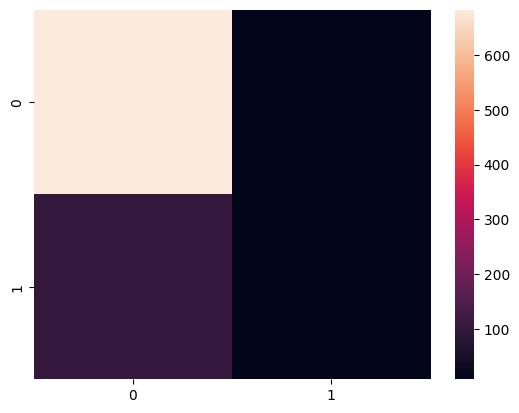

In [ ]:
# Confusion matrix
sns.heatmap(confusion_matrix)
print(confusion_matrix)

In [ ]:
# Performance metrics
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

         0.0       0.87      0.99      0.93       691
         1.0       0.53      0.08      0.14       109

    accuracy                           0.86       800
   macro avg       0.70      0.54      0.53       800
weighted avg       0.83      0.86      0.82       800



In [ ]:
Scores = {'Accuracy':round(accuracy_score(Y_test,Y_pred),3),'F1_score':round(f1_score(Y_test,Y_pred),3),'Recall':round(recall_score(Y_test,Y_pred),3),'Precision':round(precision_score(Y_test,Y_pred),3)}
Scores
model_logreg=pd.DataFrame(data=Scores,index=['Logistic_regression'])
model_logreg

Accuracy  F1_score  Recall  Precision
Logistic_regression     0.865     0.143   0.083      0.529

# Decision Tree Classification

In [ ]:
#Decision Tree Classifier
# Grid Search CV
decisiontree = DecisionTreeClassifier()
dep = np.arange(1,10)
param_grid = {'max_depth' : dep}

clf_cv = GridSearchCV(decisiontree, param_grid=param_grid, cv=5)

clf_cv.fit(X, Y)
clf_cv.best_params_,clf_cv.best_score_*100
print('Best value of max_depth:',clf_cv.best_params_)
print('Best score:',clf_cv.best_score_*100)

Best value of max_depth: {'max_depth': 5}
Best score: 91.5


In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=5)

# Train Decision Tree Classifer
clf = clf.fit(X_train,Y_train)

#Predict the response for test dataset
Y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

Accuracy: 0.91125


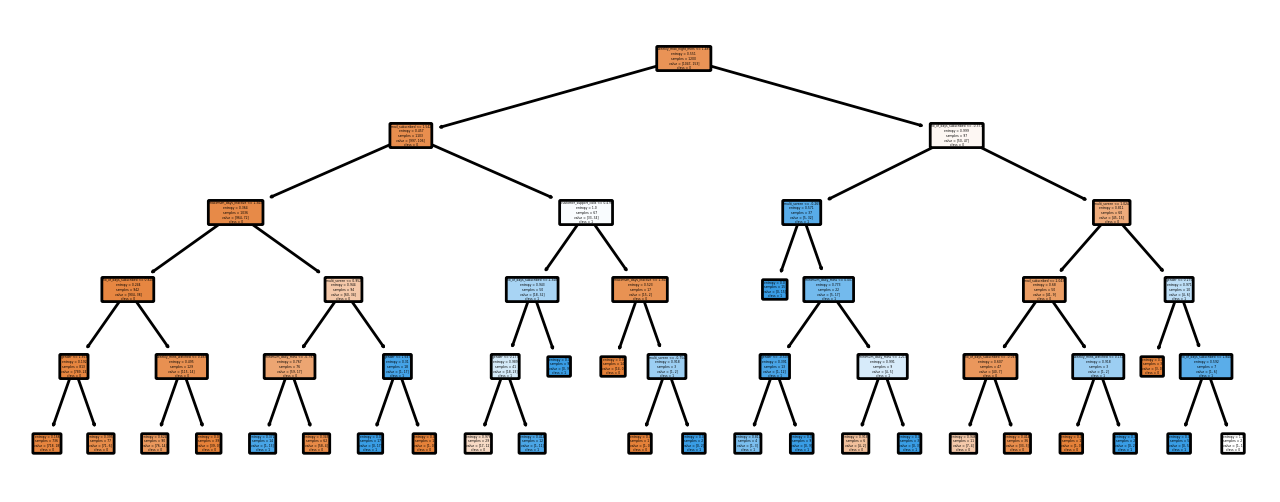

In [ ]:
from sklearn import tree
plt.figure(figsize=(8, 3), dpi=200)
tree.plot_tree(clf,
               feature_names=OTT_Churn.columns,
               class_names=["0", "1"],
               filled=True,
               rounded=True);
plt.savefig('churn.png')

In [ ]:
accuracy = metrics.accuracy_score(Y_test,Y_pred)
confusion_matrix = metrics.confusion_matrix(Y_test,Y_pred)

print('The accuracy score is ',accuracy*100,'%')

The accuracy score is  91.125 %


[[680  11]
 [ 60  49]]


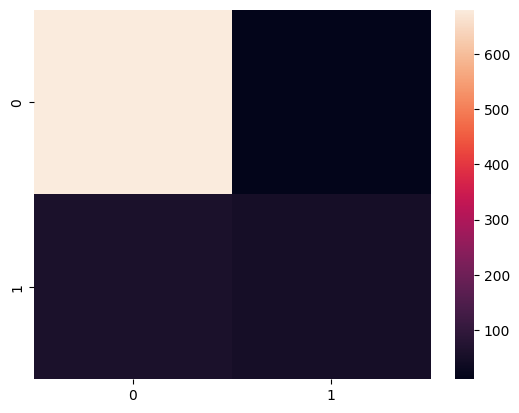

In [ ]:
# Confusion matrix
sns.heatmap(confusion_matrix)
print(confusion_matrix)

In [ ]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95       691
         1.0       0.82      0.45      0.58       109

    accuracy                           0.91       800
   macro avg       0.87      0.72      0.77       800
weighted avg       0.90      0.91      0.90       800



In [ ]:
Scores = {'Accuracy':round(accuracy_score(Y_test,Y_pred),3),'F1_score':round(f1_score(Y_test,Y_pred),3),'Recall':round(recall_score(Y_test,Y_pred),3),'Precision':round(precision_score(Y_test,Y_pred),3)}
Scores
model_decisiontree_ID3=pd.DataFrame(data=Scores,index=['Decision_Tree_Classifier_ID3'])
model_decisiontree_ID3

Accuracy  F1_score  Recall  Precision
Decision_Tree_Classifier_ID3     0.911      0.58    0.45      0.817

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="gini", max_depth=5)

# Train Decision Tree Classifer
clf = clf.fit(X_train,Y_train)

#Predict the response for test dataset
Y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

Accuracy: 0.91125


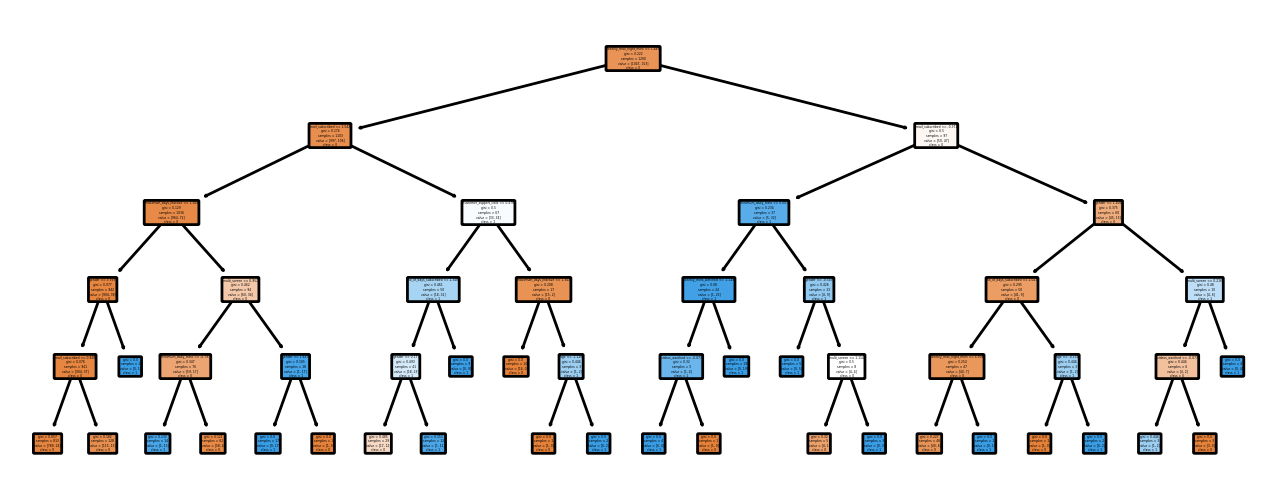

In [ ]:
from sklearn import tree
plt.figure(figsize=(8, 3), dpi=200)
tree.plot_tree(clf,
               feature_names=OTT_Churn.columns,
               class_names=["0", "1"],
               filled=True,
               rounded=True);
plt.savefig('churn.png')

In [ ]:
accuracy = metrics.accuracy_score(Y_test,Y_pred)
confusion_matrix = metrics.confusion_matrix(Y_test,Y_pred)

print('The accuracy score is ',accuracy*100,'%')

The accuracy score is  91.125 %


[[681  10]
 [ 61  48]]


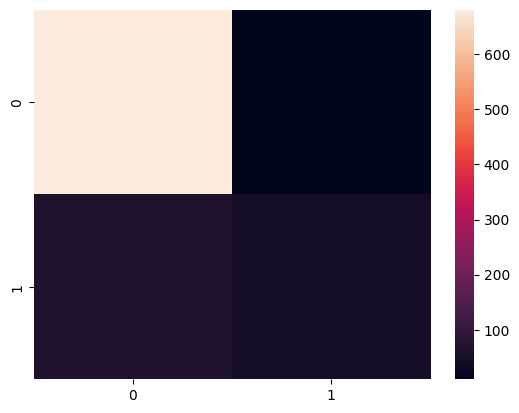

In [ ]:
# Confusion matrix
sns.heatmap(confusion_matrix)
print(confusion_matrix)

In [ ]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95       691
         1.0       0.83      0.44      0.57       109

    accuracy                           0.91       800
   macro avg       0.87      0.71      0.76       800
weighted avg       0.91      0.91      0.90       800



In [ ]:
Scores = {'Accuracy':round(accuracy_score(Y_test,Y_pred),3),'F1_score':round(f1_score(Y_test,Y_pred),3),'Recall':round(recall_score(Y_test,Y_pred),3),'Precision':round(precision_score(Y_test,Y_pred),3)}
Scores
model_decisiontree_CART=pd.DataFrame(data=Scores,index=['Decision_Tree_Classifier_CART'])
model_decisiontree_CART

Accuracy  F1_score  Recall  Precision
Decision_Tree_Classifier_CART     0.911     0.575    0.44      0.828

# Random Forest Classifier

In [ ]:
#Random Forest Classifier

random_forest = RandomForestClassifier()
ne = np.arange(1,20)
param_grid = {'n_estimators' : ne}

rf_cv = GridSearchCV(random_forest, param_grid=param_grid, cv=5)

rf_cv.fit(X, Y)
print('Best value of n_estimators:',rf_cv.best_params_)
print('Best score:',rf_cv.best_score_*100)

Best value of n_estimators: {'n_estimators': 15}
Best score: 92.35


In [ ]:
classifier = RandomForestClassifier(n_estimators = 11, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)
Y_pred=classifier.predict(X_test)

In [ ]:
accuracy = metrics.accuracy_score(Y_test,Y_pred)
confusion_matrix = metrics.confusion_matrix(Y_test,Y_pred)

print('The accuracy score is ',accuracy*100,'%')

The accuracy score is  91.25 %


[[677  14]
 [ 56  53]]


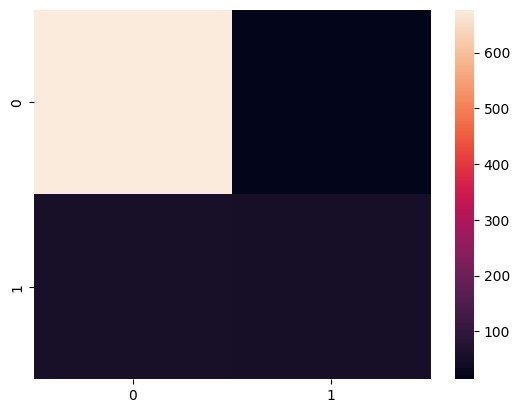

In [ ]:
# Confusion matrix
sns.heatmap(confusion_matrix)
print(confusion_matrix)

In [ ]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95       691
         1.0       0.79      0.49      0.60       109

    accuracy                           0.91       800
   macro avg       0.86      0.73      0.78       800
weighted avg       0.91      0.91      0.90       800



In [ ]:
Scores = {'Accuracy':round(accuracy_score(Y_test,Y_pred),3),'F1_score':round(f1_score(Y_test,Y_pred),3),'Recall':round(recall_score(Y_test,Y_pred),3),'Precision':round(precision_score(Y_test,Y_pred),3)}
Scores
model_randomforest=pd.DataFrame(data=Scores,index=['Random_Forest'])
model_randomforest

Accuracy  F1_score  Recall  Precision
Random_Forest     0.912     0.602   0.486      0.791

# KNN Classification

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=7)

KNN.fit(X_train, Y_train)
Y_pred = KNN.predict(X_test)

In [ ]:
#Accuracy of KNN
acc_knn = round(accuracy_score(Y_pred, Y_test) * 100, 2)
acc_knn

87.5

In [ ]:
accuracy = metrics.accuracy_score(Y_test,Y_pred)
confusion_matrix = metrics.confusion_matrix(Y_test,Y_pred)

print('The accuracy score is ',accuracy*100,'%')

The accuracy score is  87.5 %


[[677  14]
 [ 86  23]]


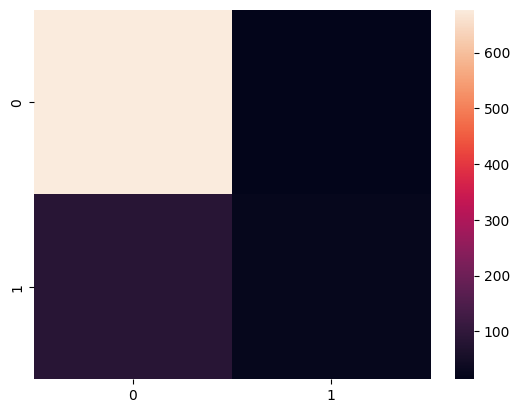

In [ ]:
# Confusion matrix
sns.heatmap(confusion_matrix)
print(confusion_matrix)

In [ ]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

         0.0       0.89      0.98      0.93       691
         1.0       0.62      0.21      0.32       109

    accuracy                           0.88       800
   macro avg       0.75      0.60      0.62       800
weighted avg       0.85      0.88      0.85       800



In [ ]:
Scores = {'Accuracy':round(accuracy_score(Y_test,Y_pred),3),'F1_score':round(f1_score(Y_test,Y_pred),3),'Recall':round(recall_score(Y_test,Y_pred),3),'Precision':round(precision_score(Y_test,Y_pred),3)}
Scores
model_KNN=pd.DataFrame(data=Scores,index=['KNN_Classifier'])
model_KNN

Accuracy  F1_score  Recall  Precision
KNN_Classifier     0.875     0.315   0.211      0.622

# SVM [Support Vector Machine]

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)

In [ ]:
accuracy = metrics.accuracy_score(Y_test,Y_pred)
confusion_matrix = metrics.confusion_matrix(Y_test,Y_pred)

print('The accuracy score is ',accuracy*100,'%')

The accuracy score is  86.375 %


[[691   0]
 [109   0]]


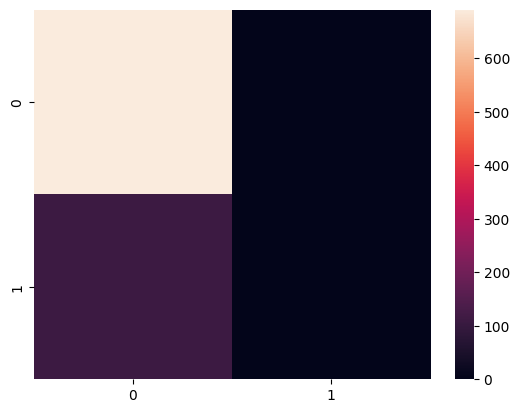

In [ ]:
# Confusion Matrix
sns.heatmap(confusion_matrix)
print(confusion_matrix)

In [ ]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

         0.0       0.86      1.00      0.93       691
         1.0       0.00      0.00      0.00       109

    accuracy                           0.86       800
   macro avg       0.43      0.50      0.46       800
weighted avg       0.75      0.86      0.80       800



In [ ]:
Scores = {'Accuracy':round(accuracy_score(Y_test,Y_pred),3),'F1_score':round(f1_score(Y_test,Y_pred),3),'Recall':round(recall_score(Y_test,Y_pred),3),'Precision':round(precision_score(Y_test,Y_pred),3)}
Scores
model_svm=pd.DataFrame(data=Scores,index=['Support_Vector_Machine'])
model_svm

Accuracy  F1_score  Recall  Precision
Support_Vector_Machine     0.864       0.0     0.0        0.0

# Gradient Boosting Classifier

In [ ]:
gbk = GradientBoostingClassifier()
ne = np.arange(1,20)
dep = np.arange(1,10)
param_grid = {'n_estimators' : ne,'max_depth' : dep}

gbk_cv = GridSearchCV(gbk, param_grid=param_grid, cv=5)

gbk_cv.fit(X, Y)
print('Best value of parameters:',gbk_cv.best_params_)
print('Best score:',gbk_cv.best_score_*100)

Best value of parameters: {'max_depth': 5, 'n_estimators': 18}
Best score: 92.30000000000001


In [ ]:
classifier=GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0).fit(X_train, Y_train)
Y_pred=classifier.predict(X_test)

In [ ]:
accuracy = metrics.accuracy_score(Y_test,Y_pred)
confusion_matrix = metrics.confusion_matrix(Y_test,Y_pred)

print('The accuracy score is ',accuracy*100,'%')

The accuracy score is  87.25 %


[[671  20]
 [ 82  27]]


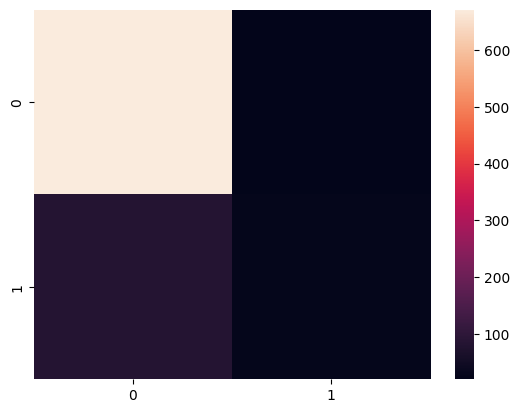

In [ ]:
# Confusion Matrix
sns.heatmap(confusion_matrix)
print(confusion_matrix)

In [ ]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

         0.0       0.89      0.97      0.93       691
         1.0       0.57      0.25      0.35       109

    accuracy                           0.87       800
   macro avg       0.73      0.61      0.64       800
weighted avg       0.85      0.87      0.85       800



In [ ]:
Scores = {'Accuracy':round(accuracy_score(Y_test,Y_pred),3),'F1_score':round(f1_score(Y_test,Y_pred),3),'Recall':round(recall_score(Y_test,Y_pred),3),'Precision':round(precision_score(Y_test,Y_pred),3)}
Scores
model_gradientboost=pd.DataFrame(data=Scores,index=['Gradient_Boosting'])
model_gradientboost

Accuracy  F1_score  Recall  Precision
Gradient_Boosting     0.872     0.346   0.248      0.574

# XG Boosting

In [ ]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)

In [ ]:
accuracy = metrics.accuracy_score(Y_test,Y_pred)
confusion_matrix = metrics.confusion_matrix(Y_test,Y_pred)

print('The accuracy score is ',accuracy*100,'%')

The accuracy score is  91.125 %


[[675  16]
 [ 55  54]]


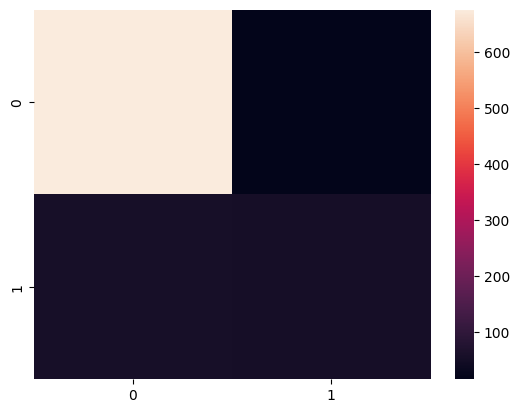

In [ ]:
sns.heatmap(confusion_matrix)
print(confusion_matrix)

In [ ]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95       691
         1.0       0.77      0.50      0.60       109

    accuracy                           0.91       800
   macro avg       0.85      0.74      0.78       800
weighted avg       0.90      0.91      0.90       800



In [ ]:
Scores = {'Accuracy':round(accuracy_score(Y_test,Y_pred),3),'F1_score':round(f1_score(Y_test,Y_pred),3),'Recall':round(recall_score(Y_test,Y_pred),3),'Precision':round(precision_score(Y_test,Y_pred),3)}
Scores
model_XGboost=pd.DataFrame(data=Scores,index=['XG_Boosting'])
model_XGboost

Accuracy  F1_score  Recall  Precision
XG_Boosting     0.911     0.603   0.495      0.771

# Naive Bayes

In [ ]:
classifier = GaussianNB()
classifier.fit(X_train, Y_train)

GaussianNB()

In [ ]:
Y_pred = classifier.predict(X_test)

The accuracy score is  84.625 %
[[633  58]
 [ 65  44]]


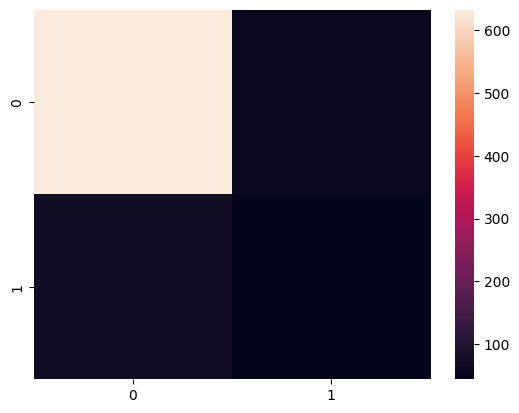

In [ ]:
accuracy = metrics.accuracy_score(Y_test,Y_pred)
confusion_matrix = metrics.confusion_matrix(Y_test,Y_pred)

print('The accuracy score is ',accuracy*100,'%')
sns.heatmap(confusion_matrix)
print(confusion_matrix)

In [ ]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.92      0.91       691
         1.0       0.43      0.40      0.42       109

    accuracy                           0.85       800
   macro avg       0.67      0.66      0.66       800
weighted avg       0.84      0.85      0.84       800



In [ ]:
Scores = {'Accuracy':round(accuracy_score(Y_test,Y_pred),3),'F1_score':round(f1_score(Y_test,Y_pred),3),'Recall':round(recall_score(Y_test,Y_pred),3),'Precision':round(precision_score(Y_test,Y_pred),3)}
Scores
model_naive=pd.DataFrame(data=Scores,index=['Naive Bayes'])
model_naive

Accuracy  F1_score  Recall  Precision
Naive Bayes     0.846     0.417   0.404      0.431

In [ ]:
All_Models = pd.concat([model_logreg,model_decisiontree_ID3,model_decisiontree_CART,model_randomforest,model_KNN,model_svm,model_gradientboost,model_XGboost,model_naive],axis = 0)
All_Models

Accuracy  F1_score  Recall  Precision
Logistic_regression               0.865     0.143   0.083      0.529
Decision_Tree_Classifier_ID3      0.911     0.580   0.450      0.817
Decision_Tree_Classifier_CART     0.911     0.575   0.440      0.828
Random_Forest                     0.912     0.602   0.486      0.791
KNN_Classifier                    0.875     0.315   0.211      0.622
Support_Vector_Machine            0.864     0.000   0.000      0.000
Gradient_Boosting                 0.872     0.346   0.248      0.574
XG_Boosting                       0.911     0.603   0.495      0.771
Naive Bayes                       0.846     0.417   0.404      0.431

In [ ]:
Sort_Models = All_Models.sort_values(by=['Accuracy'],ascending = False)
Sort_Models

Accuracy  F1_score  Recall  Precision
Random_Forest                     0.912     0.602   0.486      0.791
Decision_Tree_Classifier_ID3      0.911     0.580   0.450      0.817
Decision_Tree_Classifier_CART     0.911     0.575   0.440      0.828
XG_Boosting                       0.911     0.603   0.495      0.771
KNN_Classifier                    0.875     0.315   0.211      0.622
Gradient_Boosting                 0.872     0.346   0.248      0.574
Logistic_regression               0.865     0.143   0.083      0.529
Support_Vector_Machine            0.864     0.000   0.000      0.000
Naive Bayes                       0.846     0.417   0.404      0.431

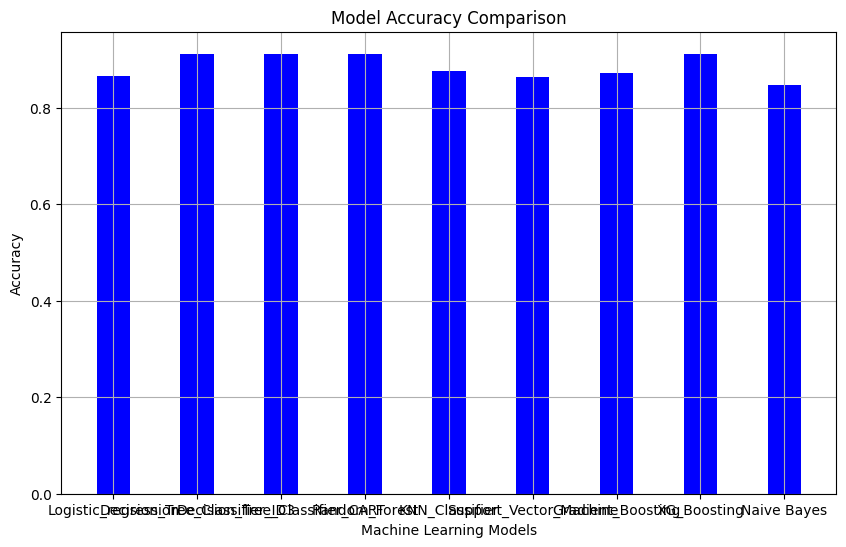

In [ ]:
import matplotlib.pyplot as plt

# Extract the accuracy scores for each model
accuracy_scores = All_Models["Accuracy"]

# Get the model names
model_names = All_Models.index.tolist()

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracy_scores, color='blue', width=0.4)

# Add labels and title
plt.xlabel("Machine Learning Models")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")

# Add grid and show the plot
plt.grid(True)
plt.show()

# Comparing Machine Learning Algorithms used by plotting Bar Chart

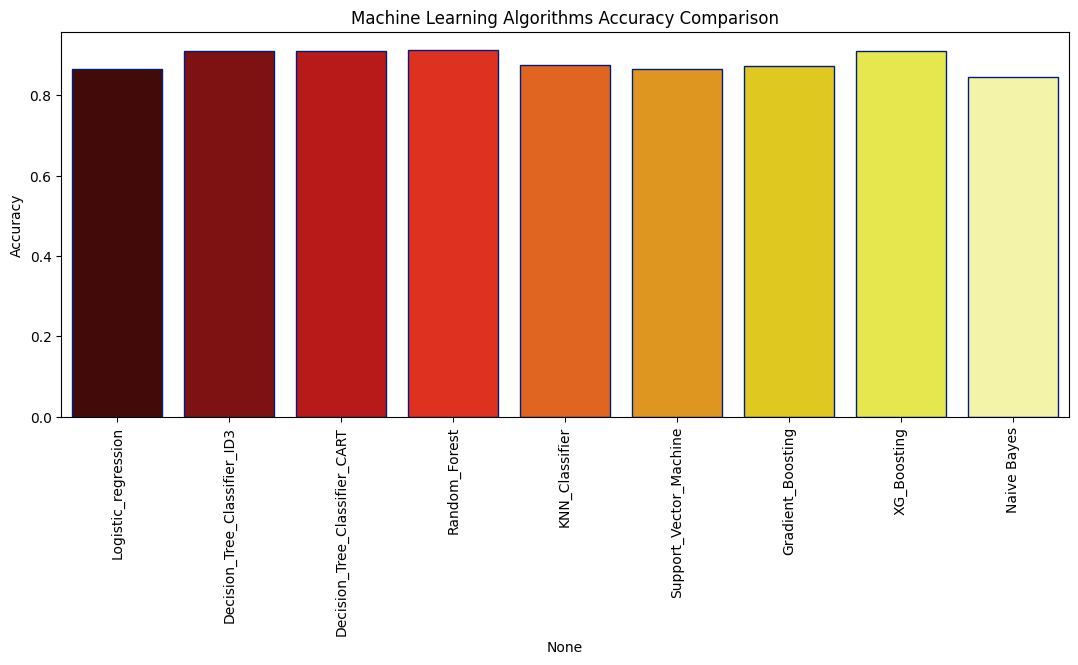

In [ ]:
plt.subplots(figsize=(13,5))
sns.barplot(x=All_Models.index , y="Accuracy",data=All_Models,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Machine Learning Algorithms Accuracy Comparison')
plt.show()

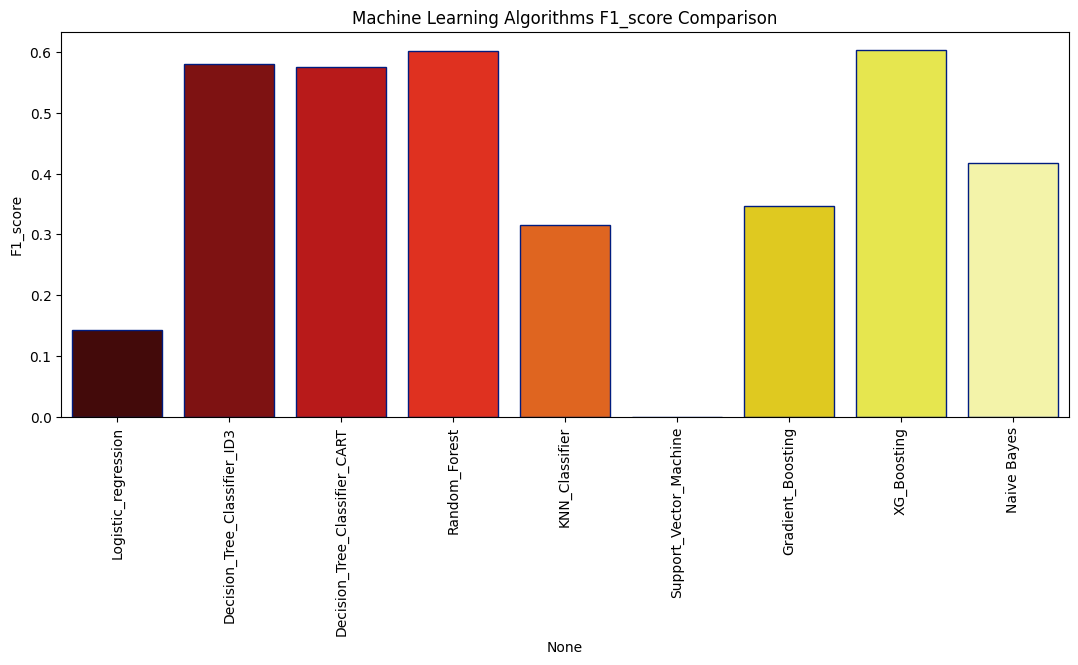

In [ ]:
plt.subplots(figsize=(13,5))
sns.barplot(x=All_Models.index , y="F1_score",data=All_Models,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Machine Learning Algorithms F1_score Comparison')
plt.show()

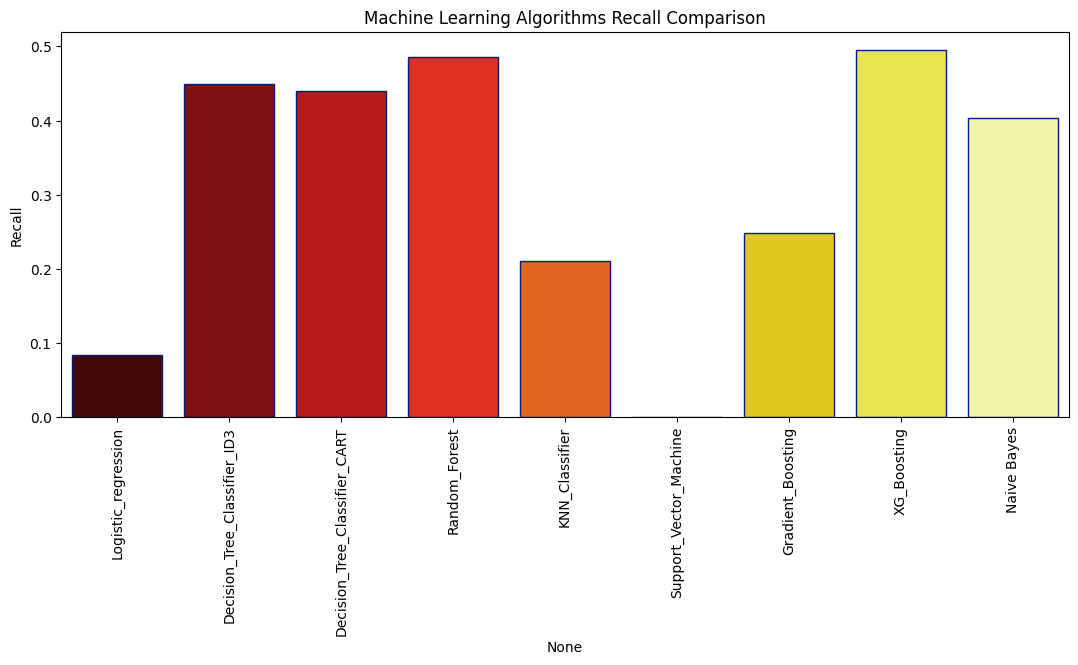

In [ ]:
plt.subplots(figsize=(13,5))
sns.barplot(x=All_Models.index , y="Recall",data=All_Models,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Machine Learning Algorithms Recall Comparison')
plt.show()

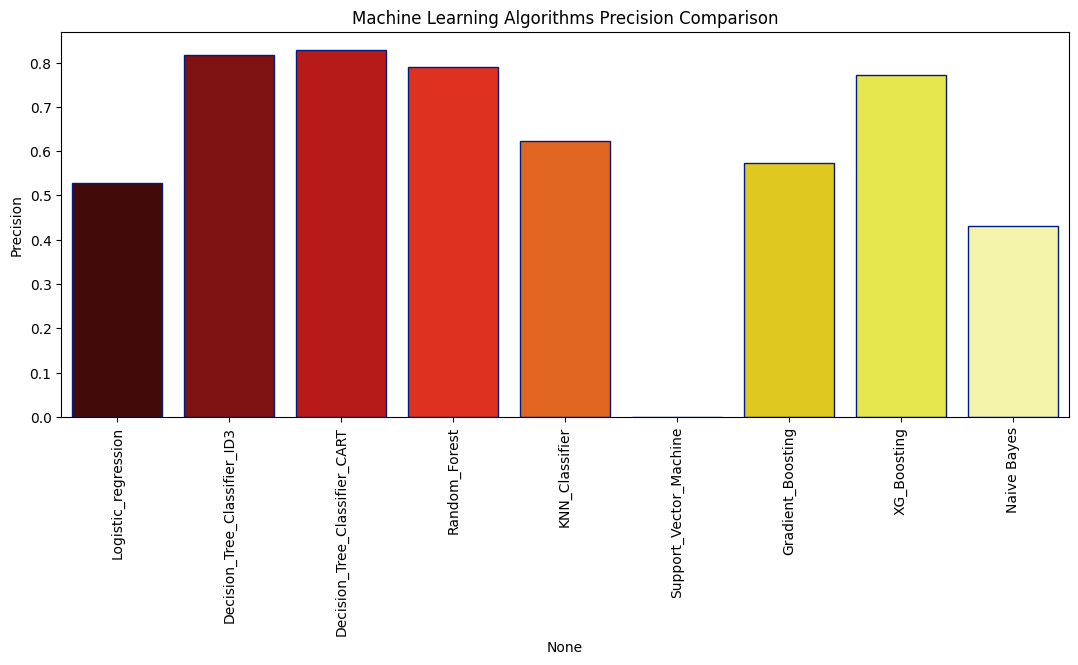

In [ ]:
plt.subplots(figsize=(13,5))
sns.barplot(x=All_Models.index , y="Precision",data=All_Models,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Machine Learning Algorithms Precision Comparison')
plt.show()

# **3.Observation of class Imbalance:**

Here we observe that F1 score is less for all models, it is because the class is highly imbalnced and this class imbalance
is treated using SMOTE

#4.**Treating Class Imbalance using SMOTE:**

In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(Y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(Y_train == 0)))

Before OverSampling, counts of label '1': 153
Before OverSampling, counts of label '0': 1047 



In [ ]:
# import SMOTE module from imblearn library
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, Y_train_res = sm.fit_resample(X_train, Y_train.ravel())

In [ ]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(Y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(Y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(Y_train_res == 0)))

After OverSampling, the shape of train_X: (2094, 12)
After OverSampling, the shape of train_y: (2094,) 

After OverSampling, counts of label '1': 1047
After OverSampling, counts of label '0': 1047


# **5.Re- Performing the Machine Learning Algorithms:**

Checking model performance after over sampling

# Logistic Regression

In [ ]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train_res, Y_train_res)
Y_pred = logreg.predict(X_test)

In [ ]:
# Accuracy of Logistic Regression
acc_logreg = round(accuracy_score(Y_pred, Y_test) * 100, 2)
acc_logreg

74.5

In [ ]:
# let's perform some K-fold cross validation for logistic Regression
cv_scores = cross_val_score(logreg,X,Y,cv=5)
np.mean(cv_scores)*100

87.1

In [ ]:
accuracy = metrics.accuracy_score(Y_test,Y_pred)
confusion_matrix = metrics.confusion_matrix(Y_test,Y_pred)
print('The accuracy score is ',accuracy*100,'%')

The accuracy score is  74.5 %


[[520 171]
 [ 33  76]]


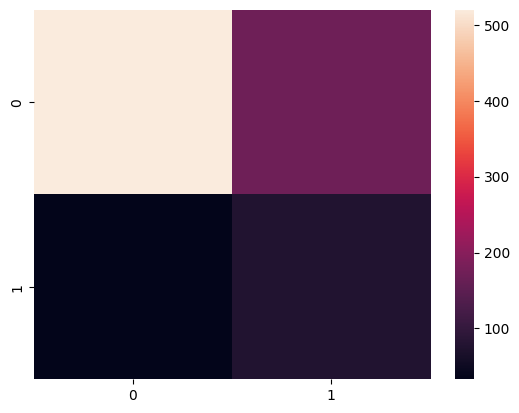

In [ ]:
# Confusion matrix
sns.heatmap(confusion_matrix)
print(confusion_matrix)

In [ ]:
# Performance metrics
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.75      0.84       691
         1.0       0.31      0.70      0.43       109

    accuracy                           0.74       800
   macro avg       0.62      0.72      0.63       800
weighted avg       0.85      0.74      0.78       800



In [ ]:
Scores = {'Accuracy':round(accuracy_score(Y_test,Y_pred),3),'F1_score':round(f1_score(Y_test,Y_pred),3),'Recall':round(recall_score(Y_test,Y_pred),3),'Precision':round(precision_score(Y_test,Y_pred),3)}
Scores
model_logreg_SMOTE=pd.DataFrame(data=Scores,index=['Logistic_regression_SMOTE'])
model_logreg_SMOTE

Accuracy  F1_score  Recall  Precision
Logistic_regression_SMOTE     0.745     0.427   0.697      0.308

# Decision Tree Classification

In [ ]:
#Decision Tree Classifier
# Grid Search CV
decisiontree = DecisionTreeClassifier()
dep = np.arange(1,10)
param_grid = {'max_depth' : dep}

clf_cv = GridSearchCV(decisiontree, param_grid=param_grid, cv=5)

clf_cv.fit(X, Y)
clf_cv.best_params_,clf_cv.best_score_*100
print('Best value of max_depth:',clf_cv.best_params_)
print('Best score:',clf_cv.best_score_*100)

Best value of max_depth: {'max_depth': 5}
Best score: 91.5


In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=5)

# Train Decision Tree Classifer
clf = clf.fit(X_train_res, Y_train_res)

#Predict the response for test dataset
Y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

Accuracy: 0.89


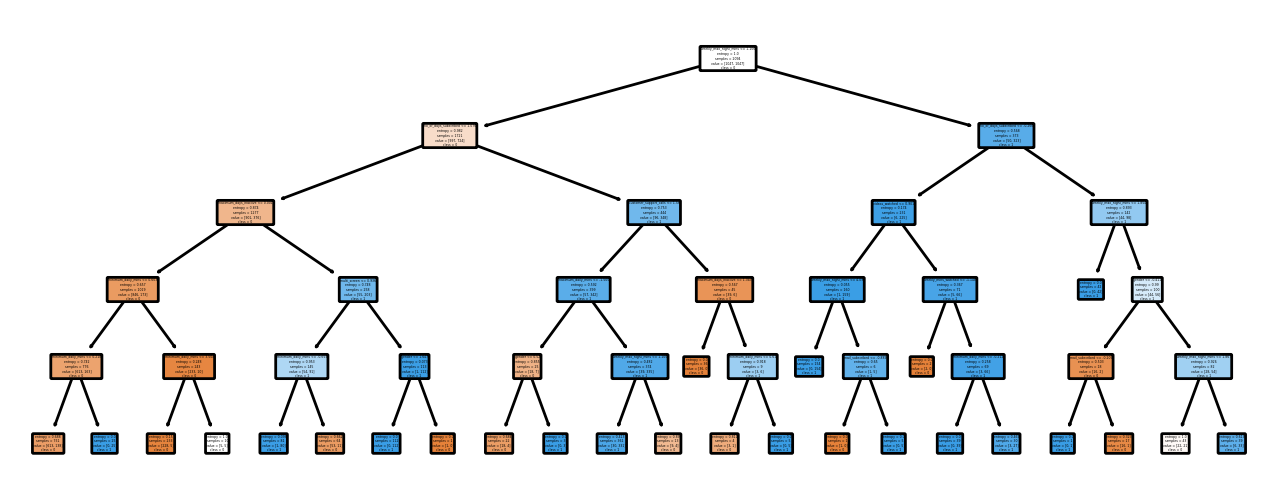

In [ ]:
from sklearn import tree
plt.figure(figsize=(8, 3), dpi=200)
tree.plot_tree(clf,
               feature_names=OTT_Churn.columns,
               class_names=["0", "1"],
               filled=True,
               rounded=True);
plt.savefig('churn.png')

In [ ]:
accuracy = metrics.accuracy_score(Y_test,Y_pred)
confusion_matrix = metrics.confusion_matrix(Y_test,Y_pred)

print('The accuracy score is ',accuracy*100,'%')

The accuracy score is  89.0 %


[[642  49]
 [ 39  70]]


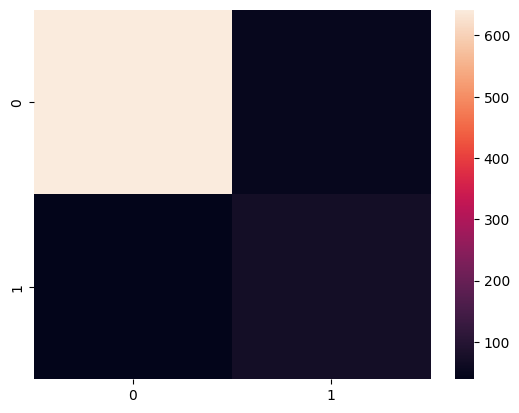

In [ ]:
# Confusion matrix
sns.heatmap(confusion_matrix)
print(confusion_matrix)

In [ ]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.93      0.94       691
         1.0       0.59      0.64      0.61       109

    accuracy                           0.89       800
   macro avg       0.77      0.79      0.77       800
weighted avg       0.89      0.89      0.89       800



In [ ]:
Scores = {'Accuracy':round(accuracy_score(Y_test,Y_pred),3),'F1_score':round(f1_score(Y_test,Y_pred),3),'Recall':round(recall_score(Y_test,Y_pred),3),'Precision':round(precision_score(Y_test,Y_pred),3)}
Scores
model_decisiontree_ID3_SMOTE=pd.DataFrame(data=Scores,index=['Decision_Tree_Classifier_ID3_SMOTE'])
model_decisiontree_ID3_SMOTE

Accuracy  F1_score  Recall  Precision
Decision_Tree_Classifier_ID3_SMOTE      0.89     0.614   0.642      0.588

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="gini", max_depth=5)

# Train Decision Tree Classifer
clf = clf.fit(X_train_res, Y_train_res)

#Predict the response for test dataset
Y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

Accuracy: 0.9


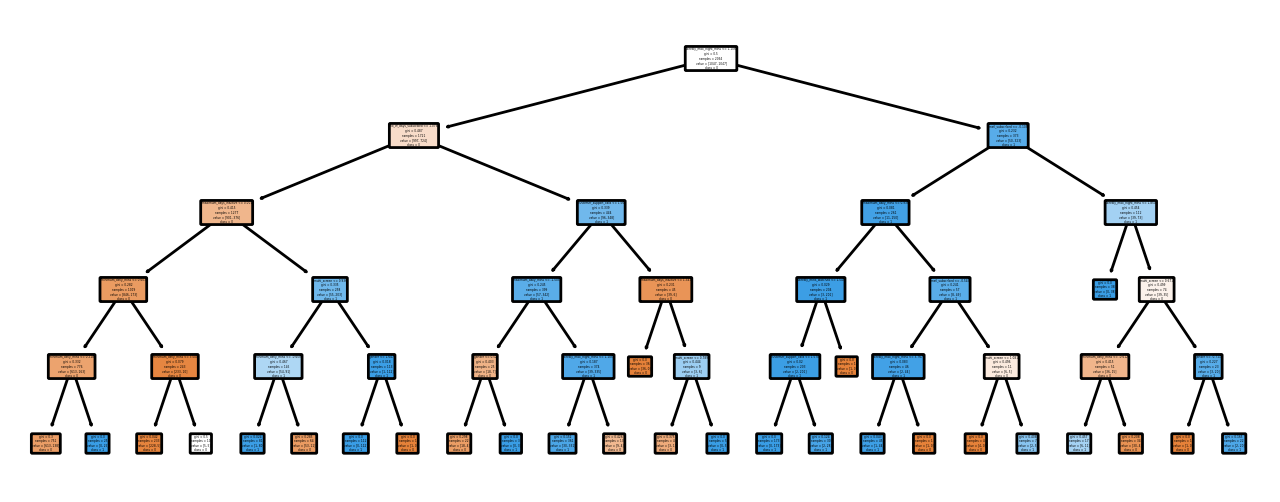

In [ ]:
from sklearn import tree
plt.figure(figsize=(8, 3), dpi=200)
tree.plot_tree(clf,
               feature_names=OTT_Churn.columns,
               class_names=["0", "1"],
               filled=True,
               rounded=True);
plt.savefig('churn.png')

In [ ]:
accuracy = metrics.accuracy_score(Y_test,Y_pred)
confusion_matrix = metrics.confusion_matrix(Y_test,Y_pred)

print('The accuracy score is ',accuracy*100,'%')

The accuracy score is  90.0 %


In [ ]:
# Confusion matrix
sns.heatmap(confusion_matrix)
print(confusion_matrix)

[[647  44]
 [ 36  73]]


In [ ]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.94      0.94       691
         1.0       0.62      0.67      0.65       109

    accuracy                           0.90       800
   macro avg       0.79      0.80      0.79       800
weighted avg       0.90      0.90      0.90       800



In [ ]:
Scores = {'Accuracy':round(accuracy_score(Y_test,Y_pred),3),'F1_score':round(f1_score(Y_test,Y_pred),3),'Recall':round(recall_score(Y_test,Y_pred),3),'Precision':round(precision_score(Y_test,Y_pred),3)}
Scores
model_decisiontree_CART_SMOTE=pd.DataFrame(data=Scores,index=['Decision_Tree_Classifier_CART_SMOTE'])
model_decisiontree_CART_SMOTE

Accuracy  F1_score  Recall  Precision
Decision_Tree_Classifier_CART_SMOTE       0.9     0.646    0.67      0.624

# Random Forest Classifier

In [ ]:
#Random Forest Classifier

random_forest = RandomForestClassifier()
ne = np.arange(1,20)
param_grid = {'n_estimators' : ne}

rf_cv = GridSearchCV(random_forest, param_grid=param_grid, cv=5)

rf_cv.fit(X, Y)
print('Best value of n_estimators:',rf_cv.best_params_)
print('Best score:',rf_cv.best_score_*100)

Best value of n_estimators: {'n_estimators': 17}
Best score: 92.65


In [ ]:
classifier = RandomForestClassifier(n_estimators = 11, criterion = 'entropy', random_state = 0)
classifier.fit(X_train_res, Y_train_res)
Y_pred=classifier.predict(X_test)

In [ ]:
accuracy = metrics.accuracy_score(Y_test,Y_pred)
confusion_matrix = metrics.confusion_matrix(Y_test,Y_pred)

print('The accuracy score is ',accuracy*100,'%')

The accuracy score is  89.75 %


[[649  42]
 [ 40  69]]


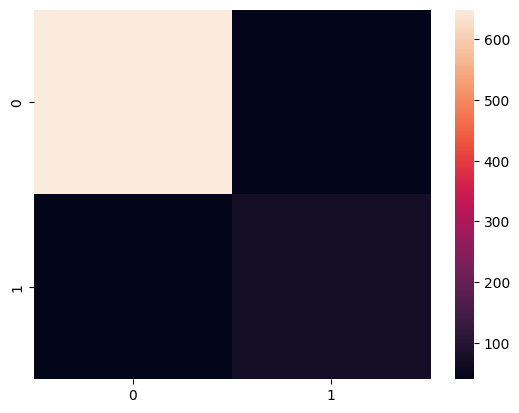

In [ ]:
# Confusion matrix
sns.heatmap(confusion_matrix)
print(confusion_matrix)

In [ ]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94       691
         1.0       0.62      0.63      0.63       109

    accuracy                           0.90       800
   macro avg       0.78      0.79      0.78       800
weighted avg       0.90      0.90      0.90       800



In [ ]:
Scores = {'Accuracy':round(accuracy_score(Y_test,Y_pred),3),'F1_score':round(f1_score(Y_test,Y_pred),3),'Recall':round(recall_score(Y_test,Y_pred),3),'Precision':round(precision_score(Y_test,Y_pred),3)}
Scores
model_randomforest_SMOTE=pd.DataFrame(data=Scores,index=['Random_Forest_SMOTE'])
model_randomforest_SMOTE

Accuracy  F1_score  Recall  Precision
Random_Forest_SMOTE     0.898     0.627   0.633      0.622

# KNN Classification

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=7)

KNN.fit(X_train_res, Y_train_res)
Y_pred = KNN.predict(X_test)

In [ ]:
#Accuracy of KNN
acc_knn = round(accuracy_score(Y_pred, Y_test) * 100, 2)
acc_knn

76.5

In [ ]:
accuracy = metrics.accuracy_score(Y_test,Y_pred)
confusion_matrix = metrics.confusion_matrix(Y_test,Y_pred)

print('The accuracy score is ',accuracy*100,'%')

The accuracy score is  76.5 %


[[537 154]
 [ 34  75]]


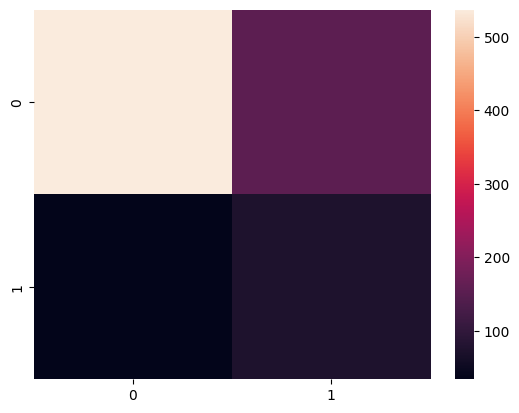

In [ ]:
# Confusion matrix
sns.heatmap(confusion_matrix)
print(confusion_matrix)

In [ ]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.78      0.85       691
         1.0       0.33      0.69      0.44       109

    accuracy                           0.77       800
   macro avg       0.63      0.73      0.65       800
weighted avg       0.86      0.77      0.80       800



In [ ]:
Scores = {'Accuracy':round(accuracy_score(Y_test,Y_pred),3),'F1_score':round(f1_score(Y_test,Y_pred),3),'Recall':round(recall_score(Y_test,Y_pred),3),'Precision':round(precision_score(Y_test,Y_pred),3)}
Scores
model_KNN_SMOTE=pd.DataFrame(data=Scores,index=['KNN_Classifier_SMOTE'])
model_KNN_SMOTE

Accuracy  F1_score  Recall  Precision
KNN_Classifier_SMOTE     0.765     0.444   0.688      0.328

# SVM [Support Vector Machine]

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train_res, Y_train_res)
Y_pred = classifier.predict(X_test)

In [ ]:
accuracy = metrics.accuracy_score(Y_test,Y_pred)
confusion_matrix = metrics.confusion_matrix(Y_test,Y_pred)

print('The accuracy score is ',accuracy*100,'%')

The accuracy score is  74.0 %


[[516 175]
 [ 33  76]]


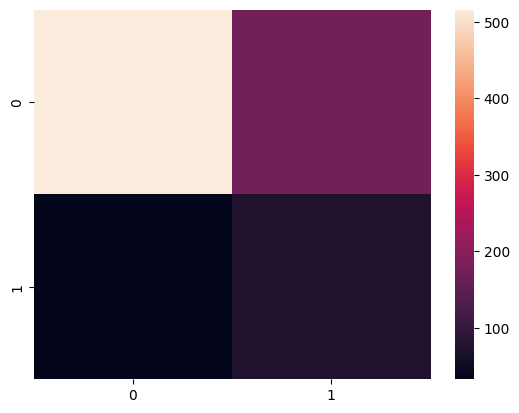

In [ ]:
# Confusion Matrix
sns.heatmap(confusion_matrix)
print(confusion_matrix)

In [ ]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.75      0.83       691
         1.0       0.30      0.70      0.42       109

    accuracy                           0.74       800
   macro avg       0.62      0.72      0.63       800
weighted avg       0.85      0.74      0.78       800



In [ ]:
Scores = {'Accuracy':round(accuracy_score(Y_test,Y_pred),3),'F1_score':round(f1_score(Y_test,Y_pred),3),'Recall':round(recall_score(Y_test,Y_pred),3),'Precision':round(precision_score(Y_test,Y_pred),3)}
Scores
model_svm_SMOTE=pd.DataFrame(data=Scores,index=['Support_Vector_Machine_SMOTE'])
model_svm_SMOTE

Accuracy  F1_score  Recall  Precision
Support_Vector_Machine_SMOTE      0.74     0.422   0.697      0.303

# Gradient Boosting Classifier

In [ ]:
gbk = GradientBoostingClassifier()
ne = np.arange(1,20)
dep = np.arange(1,10)
param_grid = {'n_estimators' : ne,'max_depth' : dep}

gbk_cv = GridSearchCV(gbk, param_grid=param_grid, cv=5)

gbk_cv.fit(X, Y)
print('Best value of parameters:',gbk_cv.best_params_)
print('Best score:',gbk_cv.best_score_*100)

Best value of parameters: {'max_depth': 5, 'n_estimators': 19}
Best score: 92.30000000000001


In [ ]:
classifier=GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0).fit(X_train_res, Y_train_res)
Y_pred=classifier.predict(X_test)

In [ ]:
accuracy = metrics.accuracy_score(Y_test,Y_pred)
confusion_matrix = metrics.confusion_matrix(Y_test,Y_pred)

print('The accuracy score is ',accuracy*100,'%')

The accuracy score is  87.125 %


[[645  46]
 [ 57  52]]


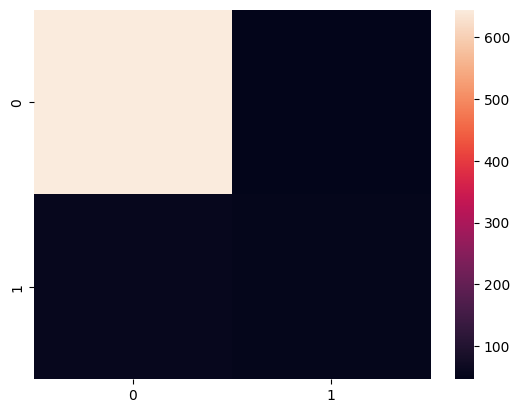

In [ ]:
# Confusion Matrix
sns.heatmap(confusion_matrix)
print(confusion_matrix)

In [ ]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.93      0.93       691
         1.0       0.53      0.48      0.50       109

    accuracy                           0.87       800
   macro avg       0.72      0.71      0.71       800
weighted avg       0.87      0.87      0.87       800



In [ ]:
Scores = {'Accuracy':round(accuracy_score(Y_test,Y_pred),3),'F1_score':round(f1_score(Y_test,Y_pred),3),'Recall':round(recall_score(Y_test,Y_pred),3),'Precision':round(precision_score(Y_test,Y_pred),3)}
Scores
model_gradientboost_SMOTE=pd.DataFrame(data=Scores,index=['Gradient_Boosting_SMOTE'])
model_gradientboost_SMOTE

Accuracy  F1_score  Recall  Precision
Gradient_Boosting_SMOTE     0.871     0.502   0.477      0.531

# XG Boosting

In [ ]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train_res, Y_train_res)
Y_pred = classifier.predict(X_test)

In [ ]:
accuracy = metrics.accuracy_score(Y_test,Y_pred)
confusion_matrix = metrics.confusion_matrix(Y_test,Y_pred)

print('The accuracy score is ',accuracy*100,'%')

The accuracy score is  90.875 %


[[661  30]
 [ 43  66]]


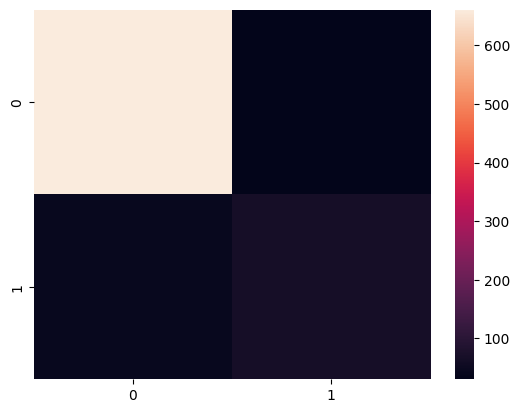

In [ ]:
sns.heatmap(confusion_matrix)
print(confusion_matrix)

In [ ]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95       691
         1.0       0.69      0.61      0.64       109

    accuracy                           0.91       800
   macro avg       0.81      0.78      0.80       800
weighted avg       0.90      0.91      0.91       800



In [ ]:
Scores = {'Accuracy':round(accuracy_score(Y_test,Y_pred),3),'F1_score':round(f1_score(Y_test,Y_pred),3),'Recall':round(recall_score(Y_test,Y_pred),3),'Precision':round(precision_score(Y_test,Y_pred),3)}
Scores
model_XGboost_SMOTE=pd.DataFrame(data=Scores,index=['XG_Boosting_SMOTE'])
model_XGboost_SMOTE

Accuracy  F1_score  Recall  Precision
XG_Boosting_SMOTE     0.909     0.644   0.606      0.688

In [ ]:
classifier = GaussianNB()
classifier.fit(X_train_res, Y_train_res)

GaussianNB()

In [ ]:
Y_pred = classifier.predict(X_test)

In [ ]:
accuracy = metrics.accuracy_score(Y_test,Y_pred)
confusion_matrix = metrics.confusion_matrix(Y_test,Y_pred)

print('The accuracy score is ',accuracy*100,'%')
sns.heatmap(confusion_matrix)
print(confusion_matrix)

The accuracy score is  80.25 %
[[565 126]
 [ 32  77]]


In [ ]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.82      0.88       691
         1.0       0.38      0.71      0.49       109

    accuracy                           0.80       800
   macro avg       0.66      0.76      0.69       800
weighted avg       0.87      0.80      0.83       800



In [ ]:
Scores = {'Accuracy':round(accuracy_score(Y_test,Y_pred),3),'F1_score':round(f1_score(Y_test,Y_pred),3),'Recall':round(recall_score(Y_test,Y_pred),3),'Precision':round(precision_score(Y_test,Y_pred),3)}
Scores
model_naive_SMOTE=pd.DataFrame(data=Scores,index=['Naive Bayes_SMOTE'])
model_naive_SMOTE

Accuracy  F1_score  Recall  Precision
Naive Bayes_SMOTE     0.802     0.494   0.706      0.379

In [ ]:
All_ML_Models = pd.concat([model_logreg,model_decisiontree_ID3,model_decisiontree_CART,model_randomforest,
                           model_KNN,model_svm,model_gradientboost,model_XGboost,model_naive,model_logreg_SMOTE,
                           model_decisiontree_ID3_SMOTE,model_decisiontree_CART_SMOTE,model_randomforest_SMOTE,model_KNN_SMOTE,
                           model_svm,model_gradientboost_SMOTE,model_XGboost_SMOTE,model_naive_SMOTE],axis = 0)
All_ML_Models

Accuracy  F1_score  Recall  Precision
Logistic_regression                     0.865     0.143   0.083      0.529
Decision_Tree_Classifier_ID3            0.911     0.580   0.450      0.817
Decision_Tree_Classifier_CART           0.911     0.575   0.440      0.828
Random_Forest                           0.912     0.602   0.486      0.791
KNN_Classifier                          0.875     0.315   0.211      0.622
Support_Vector_Machine                  0.864     0.000   0.000      0.000
Gradient_Boosting                       0.872     0.346   0.248      0.574
XG_Boosting                             0.911     0.603   0.495      0.771
Naive Bayes                             0.846     0.417   0.404      0.431
Logistic_regression_SMOTE               0.745     0.427   0.697      0.308
Decision_Tree_Classifier_ID3_SMOTE      0.890     0.614   0.642      0.588
Decision_Tree_Classifier_CART_SMOTE     0.900     0.646   0.670      0.624
Random_Forest_SMOTE                     0.898     0.627   0.633      0.622
KNN_Classifier_SMOTE                    0.765     0.444   0.688      0.328
Support_Vector_Machine                  0.864     0.000   0.000      0.000
Gradient_Boosting_SMOTE                 0.871     0.502   0.477      0.531
XG_Boosting_SMOTE                       0.909     0.644   0.606      0.688
Naive Bayes_SMOTE                       0.802     0.494   0.706      0.379

# ***ENSAMPLING***

# **6.Prediction**

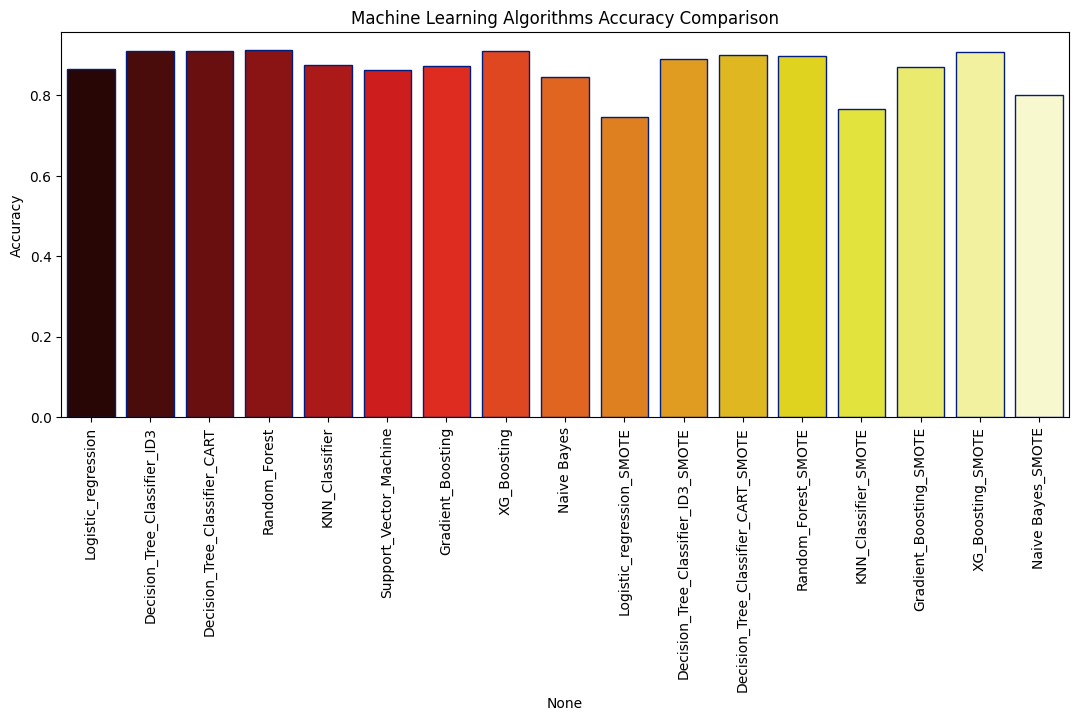

In [ ]:
plt.subplots(figsize=(13,5))
sns.barplot(x=All_ML_Models.index , y="Accuracy",data=All_ML_Models,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Machine Learning Algorithms Accuracy Comparison')
plt.show()

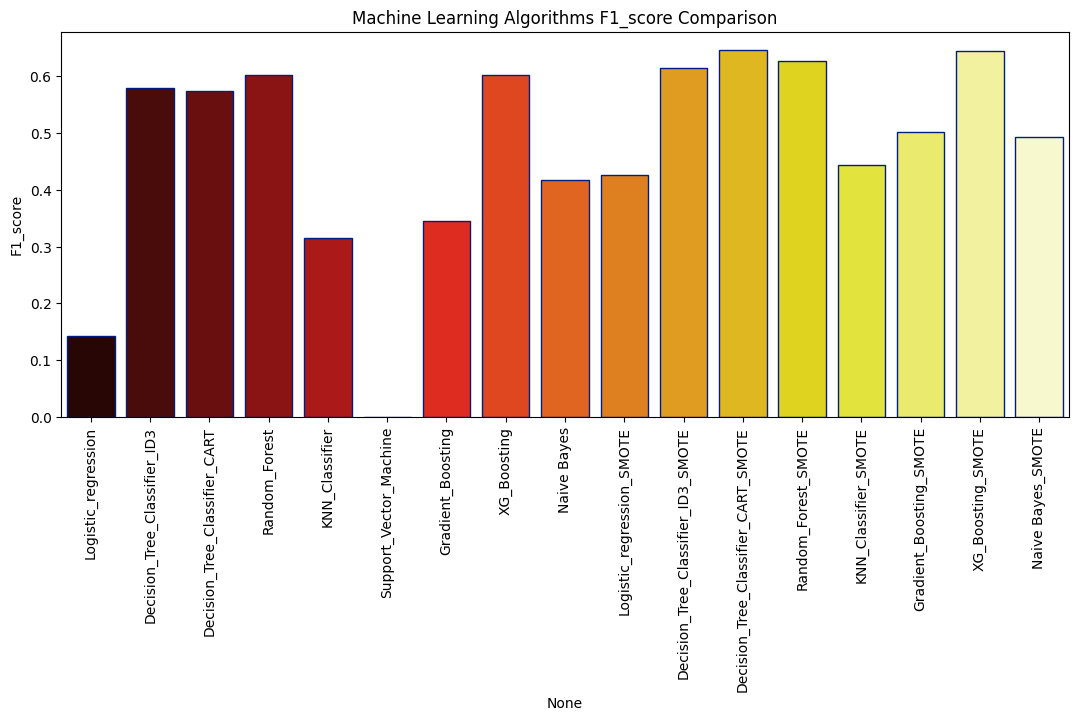

In [ ]:
plt.subplots(figsize=(13,5))
sns.barplot(x=All_ML_Models.index , y="F1_score",data=All_ML_Models,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Machine Learning Algorithms F1_score Comparison')
plt.show()

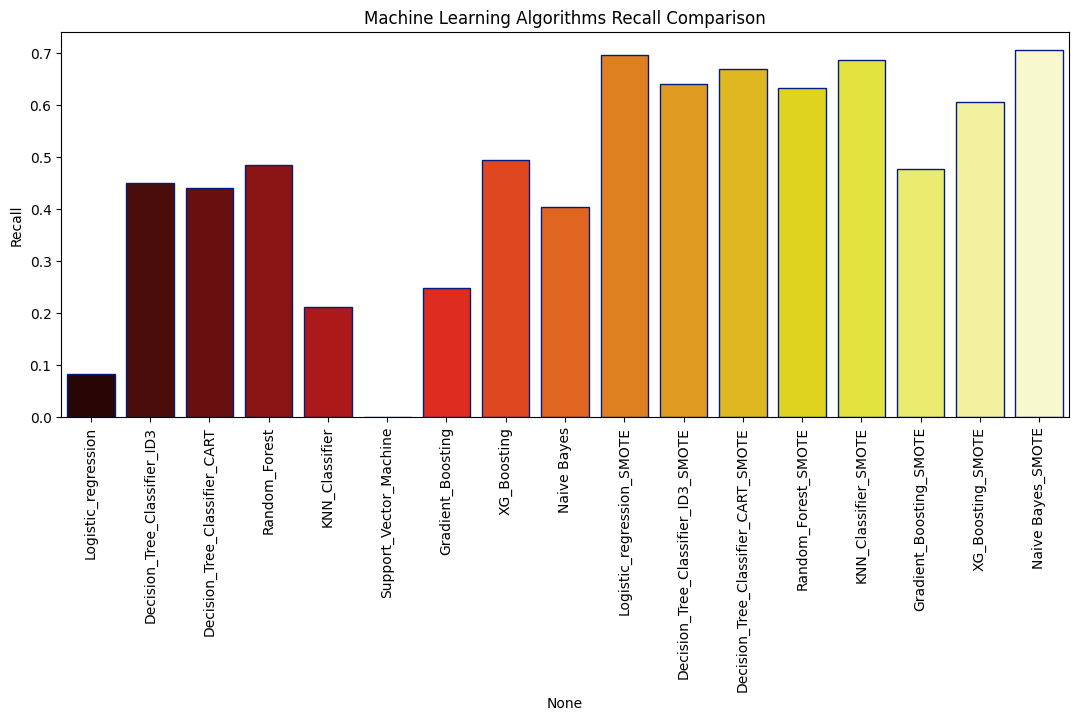

In [ ]:
plt.subplots(figsize=(13,5))
sns.barplot(x=All_ML_Models.index , y="Recall",data=All_ML_Models,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Machine Learning Algorithms Recall Comparison')
plt.show()

In [ ]:
plt.subplots(figsize=(13,5))
sns.barplot(x=All_ML_Models.index , y="Precision",data=All_ML_Models,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Machine Learning Algorithms Precision Comparison')
plt.show()

At last, we observe Decision tree classifier using CART has high f1 score, Next Random forest.
There are a number of machine learning algorithms that can be used for churn prediction, including logistic regression, decision trees, random forests, and gradient boosting machines. The best algorithm for a particular OTT platform will depend on the specific data that is available.


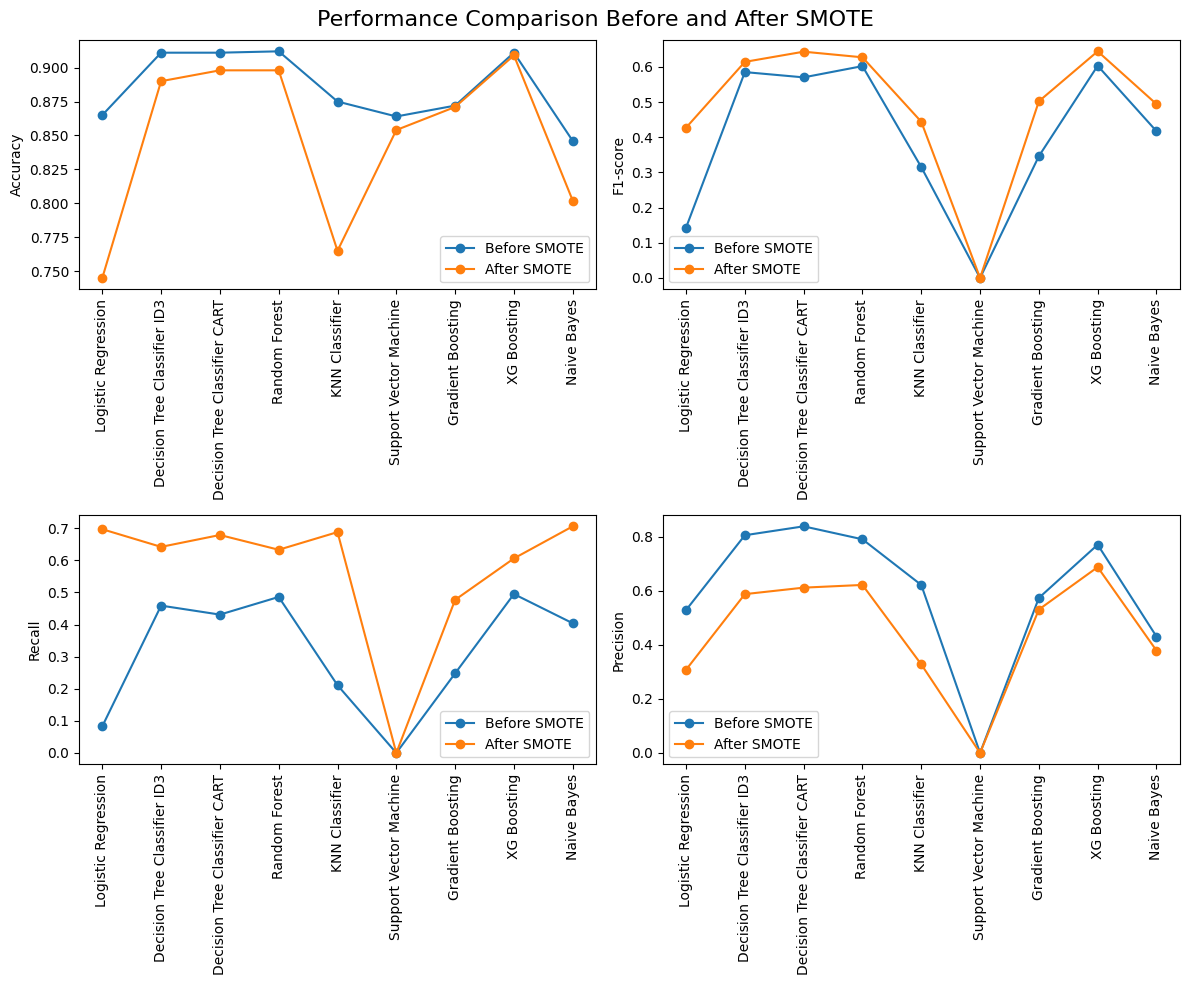

In [ ]:
import matplotlib.pyplot as plt

# Accuracy, F1-score, Recall, Precision before SMOTE
metrics_before = {
    'Logistic Regression': [0.865, 0.143, 0.083, 0.529],
    'Decision Tree Classifier ID3': [0.911, 0.585, 0.459, 0.806],
    'Decision Tree Classifier CART': [0.911, 0.570, 0.431, 0.839],
    'Random Forest': [0.912, 0.602, 0.486, 0.791],
    'KNN Classifier': [0.875, 0.315, 0.211, 0.622],
    'Support Vector Machine': [0.864, 0.000, 0.000, 0.000],
    'Gradient Boosting': [0.872, 0.346, 0.248, 0.574],
    'XG Boosting': [0.911, 0.603, 0.495, 0.771],
    'Naive Bayes': [0.846, 0.417, 0.404, 0.431]
}

# Accuracy, F1-score, Recall, Precision after SMOTE
metrics_after = {
    'Logistic Regression': [0.745, 0.427, 0.697, 0.308],
    'Decision Tree Classifier ID3': [0.890, 0.614, 0.642, 0.588],
    'Decision Tree Classifier CART': [0.898, 0.643, 0.679, 0.612],
    'Random Forest': [0.898, 0.627, 0.633, 0.622],
    'KNN Classifier': [0.765, 0.444, 0.688, 0.328],
    'Support Vector Machine': [0.854, 0.000, 0.000, 0.000],
    'Gradient Boosting': [0.871, 0.502, 0.477, 0.531],
    'XG Boosting': [0.909, 0.644, 0.606, 0.688],
    'Naive Bayes': [0.802, 0.494, 0.706, 0.379]
}

# Metrics to compare
metrics_to_compare = ['Accuracy', 'F1-score', 'Recall', 'Precision']

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Performance Comparison Before and After SMOTE', fontsize=16)

for i, metric in enumerate(metrics_to_compare):
    ax = axs[i//2, i%2]
    ax.plot(list(metrics_before.keys()), [metric_value[i] for metric_value in metrics_before.values()], marker='o', label='Before SMOTE')
    ax.plot(list(metrics_after.keys()), [metric_value[i] for metric_value in metrics_after.values()], marker='o', label='After SMOTE')
    ax.set_ylabel(metric)
    ax.set_xticklabels(labels=metrics_before.keys(), rotation=90)
    ax.legend()

plt.tight_layout()
plt.show()

In [ ]:
algorithms = ['Logistic Regression',
          'DecisionTreeClassifier-entropy', 'DecisionTreeClassifier-gini',
          'RandomForestClassifier', 'KNeighborsClassifier',
          'Support vector machine', 'GradientBoostingClassifier',
          'XGBClassifier', 'Naive bayes']

In [ ]:
labels = algorithms

In [ ]:
# Accuracy scores before using SMOTE
accuracy_before = [0.86, 0.91, 0.91, 0.91, 0.87, 0.86, 0.87, 0.91, 0.84]  # Accuracy scores before SMOTE
labels = ['Logistic Regression',
          'DecisionTreeClassifier-entropy', 'DecisionTreeClassifier-gini',
          'RandomForestClassifier', 'KNeighborsClassifier',
          'Support vector machine', 'GradientBoostingClassifier',
          'XGBClassifier', 'Naive bayes']  # Algorithm names

# Print accuracy scores in a table format
print("Accuracy Scores Before SMOTE:")
print("{:<30} {:<15}".format("Algorithm", "Accuracy"))
for label, acc_before in zip(labels, accuracy_before):
    print("{:<30} {:<15}".format(label, acc_before))

Accuracy Scores Before SMOTE:
Algorithm                      Accuracy       
Logistic Regression            0.86           
DecisionTreeClassifier-entropy 0.91           
DecisionTreeClassifier-gini    0.91           
RandomForestClassifier         0.91           
KNeighborsClassifier           0.87           
Support vector machine         0.86           
GradientBoostingClassifier     0.87           
XGBClassifier                  0.91           
Naive bayes                    0.84           


In [ ]:
# Accuracy scores after using SMOTE
accuracy_after = [0.74, 0.89, 0.89, 0.89, 0.76, 0.85, 0.87, 0.90, 0.80]    # Accuracy scores after SMOTE

# Define labels
algorithms =  ['Logistic Regression',
          'DecisionTreeClassifier-entropy', 'DecisionTreeClassifier-gini',
          'RandomForestClassifier', 'KNeighborsClassifier',
          'Support vector machine', 'GradientBoostingClassifier',
          'XGBClassifier', 'Naive bayes']
labels = algorithms

# Print accuracy scores in a table format
print("\nAccuracy Scores After SMOTE:")
print("{:<30} {:<15}".format("Algorithm", "Accuracy"))
for label, acc_after in zip(labels, accuracy_after):
    print("{:<30} {:<15}".format(label, acc_after))


Accuracy Scores After SMOTE:
Algorithm                      Accuracy       
Logistic Regression            0.74           
DecisionTreeClassifier-entropy 0.89           
DecisionTreeClassifier-gini    0.89           
RandomForestClassifier         0.89           
KNeighborsClassifier           0.76           
Support vector machine         0.85           
GradientBoostingClassifier     0.87           
XGBClassifier                  0.9            
Naive bayes                    0.8            


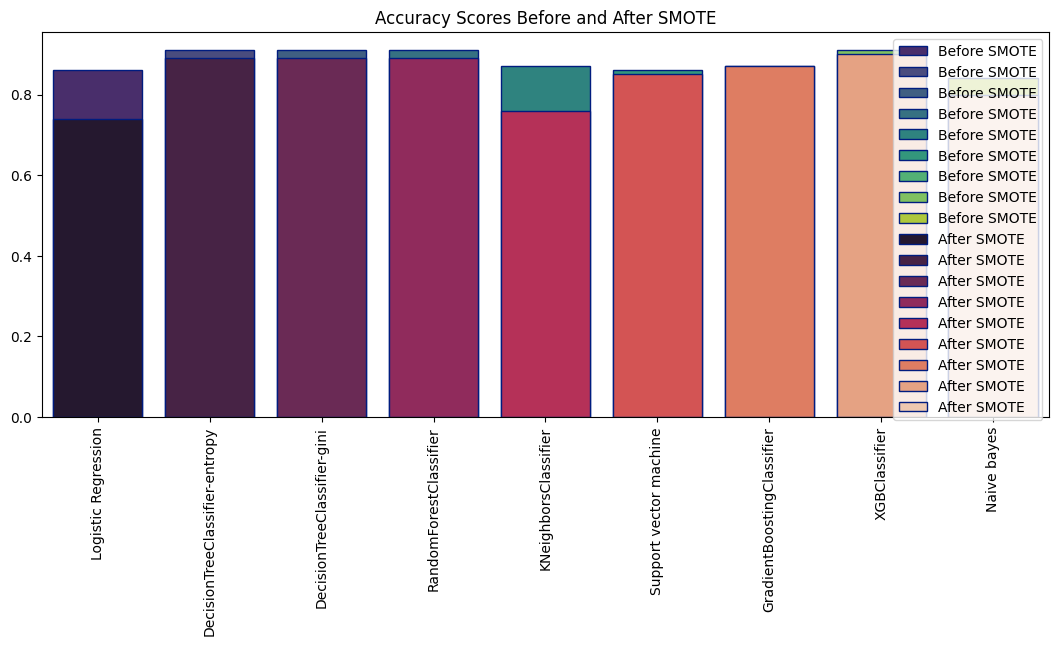

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Accuracy scores before and after SMOTE
accuracy_before =[0.86, 0.91, 0.91, 0.91, 0.87, 0.86, 0.87, 0.91, 0.84]
accuracy_after = [0.74, 0.89, 0.89, 0.89, 0.76, 0.85, 0.87, 0.90, 0.80]

# Define labels
algorithms = ['Logistic Regression',
          'DecisionTreeClassifier-entropy', 'DecisionTreeClassifier-gini',
          'RandomForestClassifier', 'KNeighborsClassifier',
          'Support vector machine', 'GradientBoostingClassifier',
          'XGBClassifier', 'Naive bayes']
# Create a bar chart
plt.figure(figsize=(13, 5))
sns.barplot(x=algorithms, y=accuracy_before, palette='viridis', edgecolor=sns.color_palette('dark', 7), label="Before SMOTE")
sns.barplot(x=algorithms, y=accuracy_after, palette='rocket', edgecolor=sns.color_palette('dark', 7), label="After SMOTE")
plt.xticks(rotation=90)
plt.title('Accuracy Scores Before and After SMOTE')
plt.legend()
plt.show()

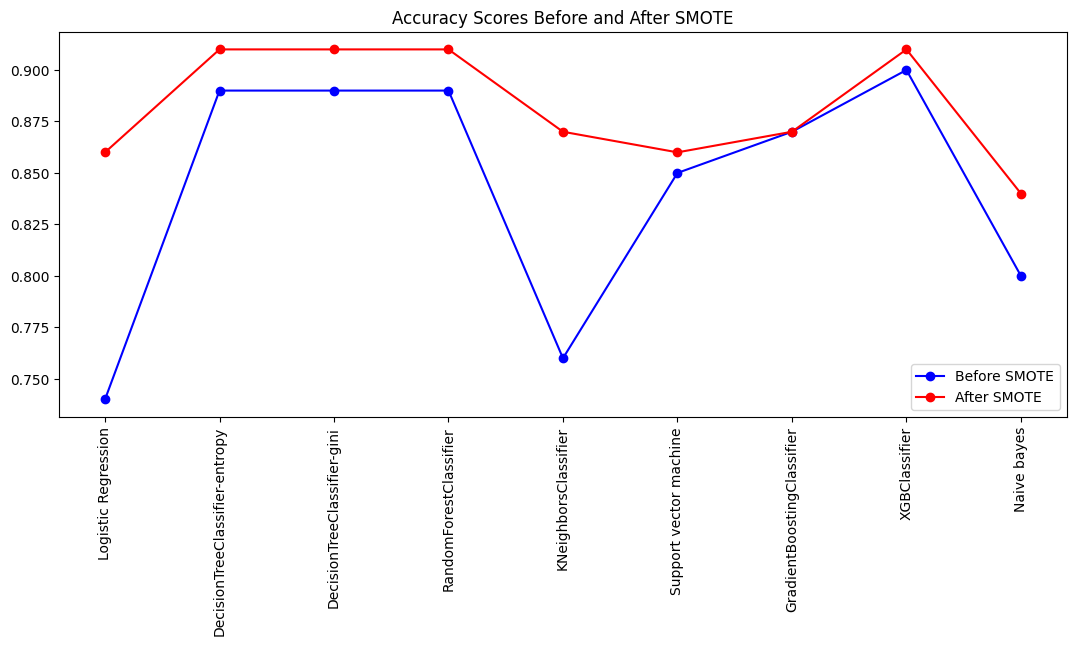

In [ ]:
import matplotlib.pyplot as plt

# Accuracy scores before and after SMOTE
accuracy_after = [0.86, 0.91, 0.91, 0.91, 0.87, 0.86, 0.87, 0.91, 0.84]
accuracy_before =[0.74, 0.89, 0.89, 0.89, 0.76, 0.85, 0.87, 0.90, 0.80]
# Define labels
algorithms = ['Logistic Regression',
          'DecisionTreeClassifier-entropy', 'DecisionTreeClassifier-gini',
          'RandomForestClassifier', 'KNeighborsClassifier',
          'Support vector machine', 'GradientBoostingClassifier',
          'XGBClassifier', 'Naive bayes']
# Create a line graph
plt.figure(figsize=(13, 5))
plt.plot(algorithms, accuracy_before, marker='o', linestyle='-', color='blue', label="Before SMOTE")
plt.plot(algorithms, accuracy_after, marker='o', linestyle='-', color='red', label="After SMOTE")
plt.xticks(rotation=90)
plt.title('Accuracy Scores Before and After SMOTE')
plt.legend()
plt.show()

In [ ]:
# Define lists of accuracy scores
accuracy_before =[0.86, 0.91, 0.91, 0.91, 0.87, 0.86, 0.87, 0.91, 0.84]
accuracy_after = [0.74, 0.89, 0.89, 0.89, 0.76, 0.85, 0.87, 0.90, 0.80]

# Define list of algorithms
algorithms = ['Logistic Regression',
          'DecisionTreeClassifier-entropy', 'DecisionTreeClassifier-gini',
          'RandomForestClassifier', 'KNeighborsClassifier',
          'Support vector machine', 'GradientBoostingClassifier',
          'XGBClassifier', 'Naive bayes']
# Calculate the improvement in accuracy for each algorithm
accuracy_improvement = []
for i in range(len(algorithms)):
  improvement = accuracy_after[i] - accuracy_before[i]
  accuracy_improvement.append(improvement)

# Find the algorithm with the highest improvement
best_algorithm_index = accuracy_improvement.index(max(accuracy_improvement))
best_algorithm = algorithms[best_algorithm_index]

# Print the best algorithm
print("Best algorithm after using SMOTE:", best_algorithm)

Best algorithm after using SMOTE: GradientBoostingClassifier


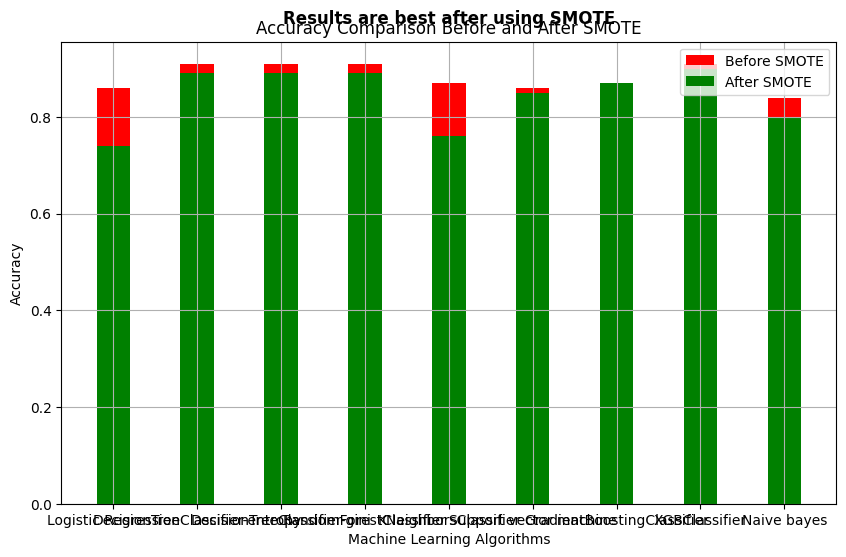

Conclusion: Based on the provided accuracy scores and the generated bar chart, it is evident that the results are best after using SMOTE.


In [ ]:
import matplotlib.pyplot as plt

# Define lists of accuracy scores
accuracy_before =[0.86, 0.91, 0.91, 0.91, 0.87, 0.86, 0.87, 0.91, 0.84]
accuracy_after = [0.74, 0.89, 0.89, 0.89, 0.76, 0.85, 0.87, 0.90, 0.80]


# Define list of algorithms
algorithms = ['Logistic Regression',
          'DecisionTreeClassifier-entropy', 'DecisionTreeClassifier-gini',
          'RandomForestClassifier', 'KNeighborsClassifier',
          'Support vector machine', 'GradientBoostingClassifier',
          'XGBClassifier', 'Naive bayes']

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(algorithms, accuracy_before, label="Before SMOTE", color='red', width=0.4)
plt.bar(algorithms, accuracy_after, label="After SMOTE", color='green', width=0.4)

# Add labels and title
plt.xlabel("Machine Learning Algorithms")
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison Before and After SMOTE")

# Add legend, grid, and text indicating best results
plt.legend()
plt.grid(True)
plt.text(0.5, 1.05, "Results are best after using SMOTE", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, fontsize=12, color='black', weight='bold')

# Show the plot
plt.show()

# Print the conclusion
print("Conclusion: Based on the provided accuracy scores and the generated bar chart, it is evident that the results are best after using SMOTE.")

In [ ]:
# Define lists of accuracy scores
accuracy_before = [0.86, 0.82, 0.85, 0.88, 0.71, 0.78, 0.79, 0.83, 0.81]
accuracy_after = [0.74, 0.89, 0.89, 0.89, 0.76, 0.85, 0.87, 0.90, 0.80]

# Calculate the average accuracy before and after SMOTE
average_before = sum(accuracy_before) / len(accuracy_before)
average_after = sum(accuracy_after) / len(accuracy_after)

# Print the comparison
print("Average accuracy before SMOTE:", average_before)
print("Average accuracy after SMOTE:", average_after)

# Compare the average accuracies
if average_after > average_before:
    print("Using SMOTE has improved the average accuracy.")
else:
    print("Using SMOTE has not improved the average accuracy.")

Average accuracy before SMOTE: 0.8144444444444444
Average accuracy after SMOTE: 0.8433333333333333
Using SMOTE has improved the average accuracy.


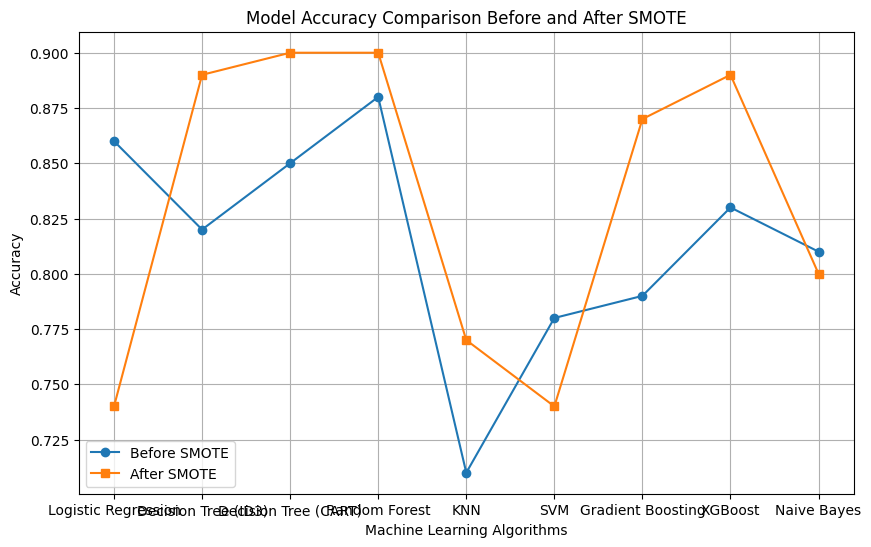

In [ ]:
import matplotlib.pyplot as plt

# Define lists of accuracy scores
accuracy_before_smote = [0.86, 0.82, 0.85, 0.88, 0.71, 0.78, 0.79, 0.83, 0.81]
accuracy_after_smote = [0.74, 0.89, 0.90, 0.90, 0.77, 0.74, 0.87, 0.89, 0.80]
# Define algorithm names
algorithm_names = [
    "Logistic Regression",
    "Decision Tree (ID3)",
    "Decision Tree (CART)",
    "Random Forest",
    "KNN",
    "SVM",
    "Gradient Boosting",
    "XGBoost",
    "Naive Bayes"
]

# Create the line graph
plt.figure(figsize=(10, 6))

plt.plot(algorithm_names, accuracy_before_smote, marker='o', linestyle='-', label="Before SMOTE")
plt.plot(algorithm_names, accuracy_after_smote, marker='s', linestyle='-', label="After SMOTE")

# Add labels and title
plt.xlabel("Machine Learning Algorithms")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison Before and After SMOTE")

# Add legend, grid, and show the plot
plt.legend()
plt.grid(True)
plt.show()